<a href="https://colab.research.google.com/github/Denis0213/MASTER-THESIS/blob/main/Copie_de_COVID_19_MSc_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. EXPLORATORY DATA ANALYSIS

# Data Source




The dataset used in this article is from the kaggle free datasets: [Diagnosis of COVID-19 and its clinical spectrum](https://www.kaggle.com/einsteindata4u/covid19/data?select=dataset.xlsx),


# Data visualization

In [ ]:
# New librairy set up
!pip install missingpy

     |████████████████████████████████| 49 kB 2.5 MB/s 


In [ ]:
# Libraries import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from missingpy import MissForest
from sklearn.impute import SimpleImputer
plt.rcParams["axes.labelsize"] = 18 
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None
pd.options.display.max_rows = None
from IPython.display import display

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
#Data overview
from google.colab import files
import io
uploaded= files.upload()

Saving covid_19_2.xlsx to covid_19_2.xlsx


In [ ]:
data=pd.read_excel(io.BytesIO(uploaded['covid_19_2.xlsx']))
data.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    

In [ ]:
# dataset´s shape

df1=data.copy()
df1.shape

(5644, 111)

The dataset contains 5644 raws and 111 columns. The raws are the different observations and the columns are the variables or features.

# Understanding Data

# Target variable
The target variable is "SARS-Cov-2 exam result"

In [ ]:
# the others variables overview
df1.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
Patient addmited to intensive care unit (1=yes, 0=no)      int64
Hematocrit                                               float64
Hemoglobin                                               float64
Platelets                                                float64
Mean platelet volume                                     float64
Red blood Cells                                          float64
Lymphocytes                                              float64
Mean corpuscular hemoglobin concentration (MCHC)         float64
Leukocytes                                               float64
Basophils                                                float64
Mean corpuscular hemoglob

In [ ]:
# FEATURE SELECTION 1
# Patient ID is useless for the model. So, it must be dropped.
df1.drop('Patient ID', inplace=True, axis=1)
df1.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    NaN                    NaN   
1    not_detected               detected                    NaN   


In [ ]:
# Variables types
df1.dtypes.value_counts()

float64    70
object     36
int64       4
dtype: int64

The dataset contains 3 types of variables which are integer, float and object. So there are numerical variables (integer and float) and categorical variables (object).

#Numerical variables

In [ ]:
# List of numerical variables
numerical_variables=[feature for feature in df1.columns if df1[feature].dtypes !='O']
df1[numerical_variables].head(5)

Patient age quantile  Patient addmited to regular ward (1=yes, 0=no)  \
0                    13                                               0   
1                    17                                               0   
2                     8                                               0   
3                     5                                               0   
4                    15                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

   Mycoplasma pneumoniae  Neutrophils      Urea  Proteina C reativa mg/dL  \
0                    NaN          NaN       NaN                       NaN   
1                    NaN    -0.619086  1.198059                 -0.147895   
2                    NaN          NaN       NaN                       NaN   
3                    NaN          NaN       NaN                       NaN   
4                    NaN          NaN       NaN                       NaN   

   Creatinine  Potassium    Sodium  Alanine transaminase  \
0         NaN        NaN       NaN                   NaN   
1    2.089928  -0.305787  0.862512                   NaN   
2         NaN        NaN       NaN                   NaN   
3         NaN        NaN       NaN                   NaN   
4         NaN        NaN       NaN                   NaN   

   Aspart

There are 74 variables numerical in the dataset. Except for the first 4, we notice that these numerical variables correspond to the blood tests.

There are 34 independant discrete numerical variables

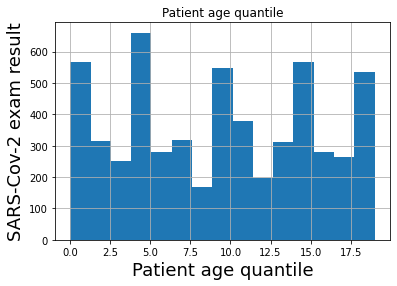

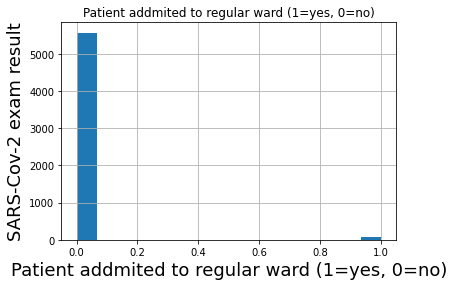

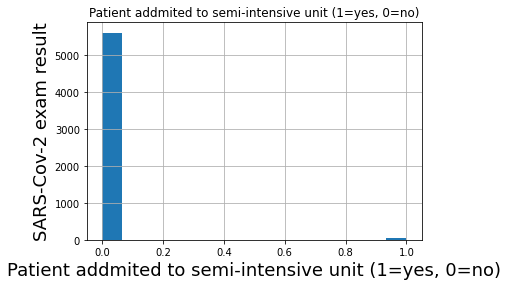

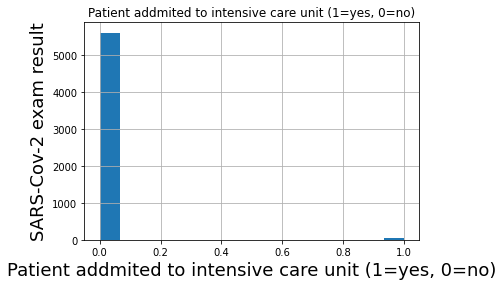

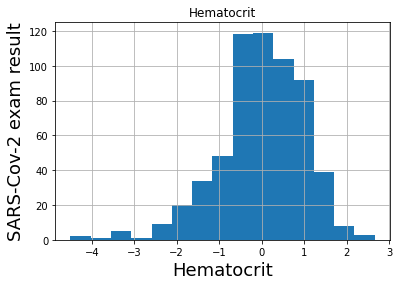

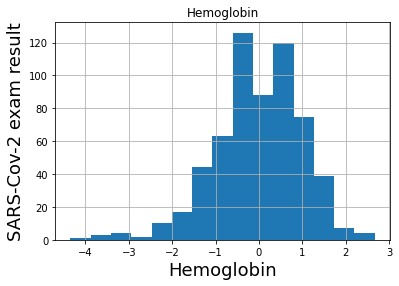

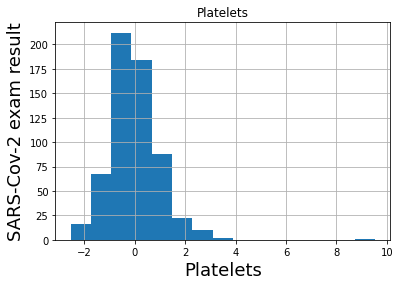

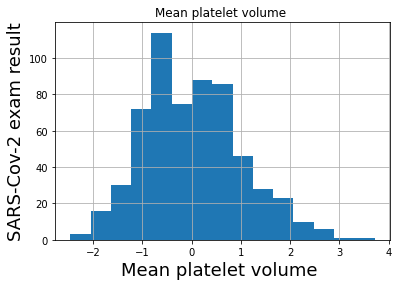

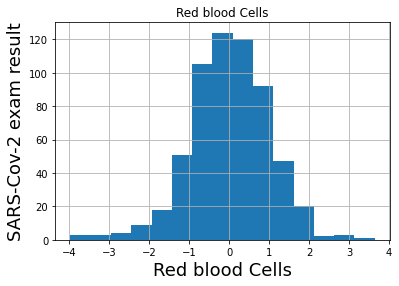

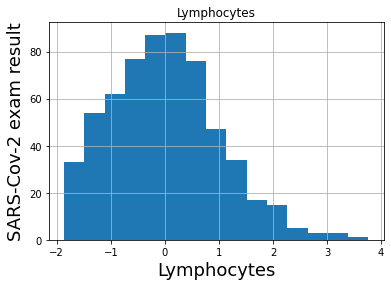

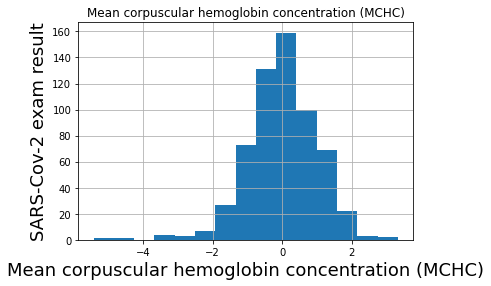

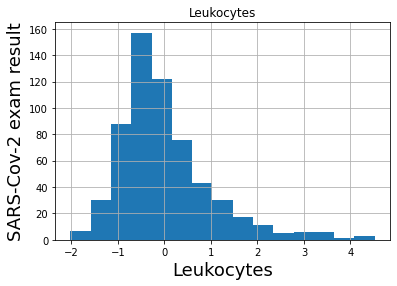

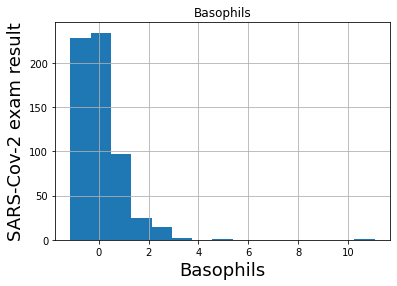

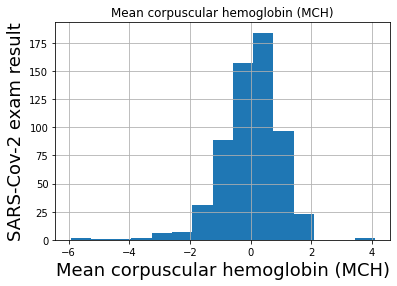

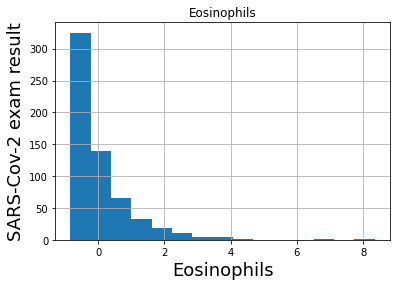

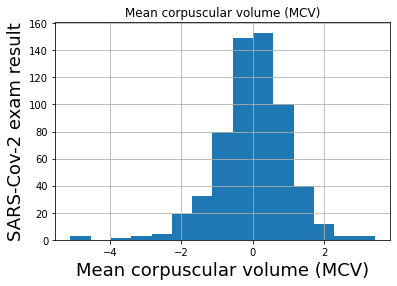

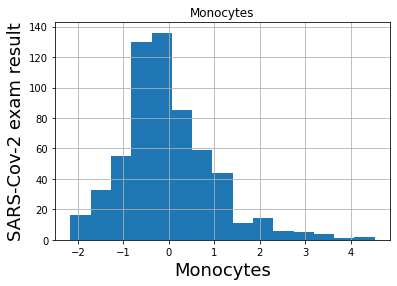

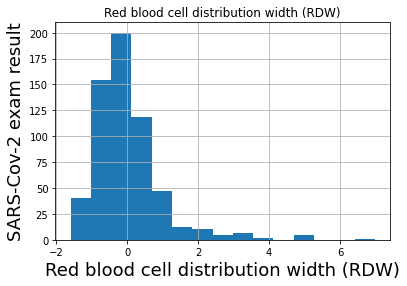

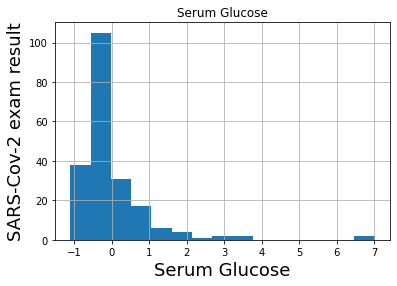

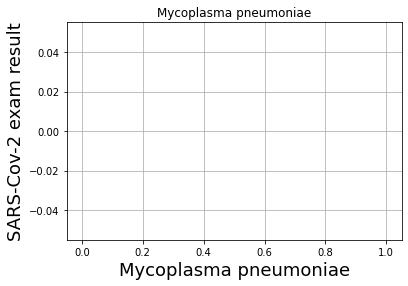

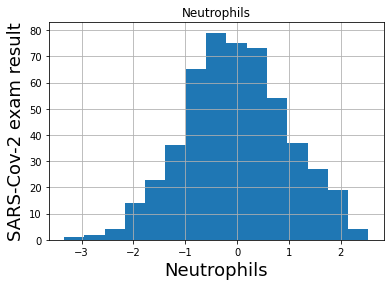

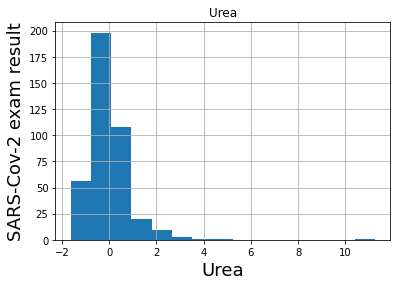

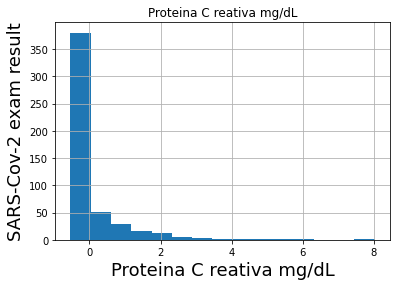

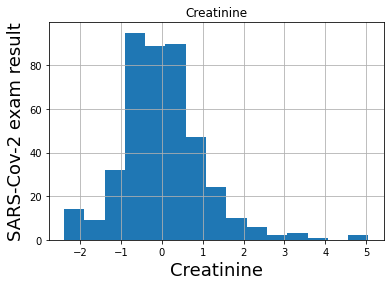

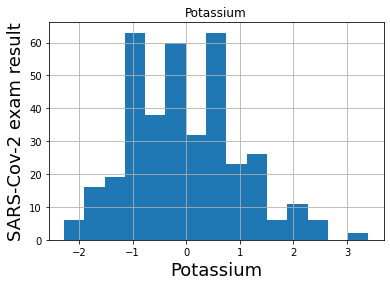

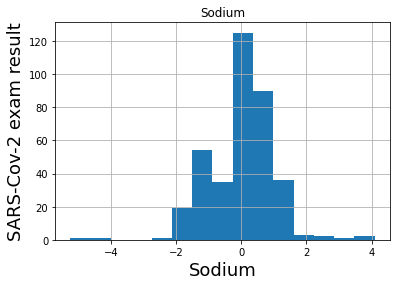

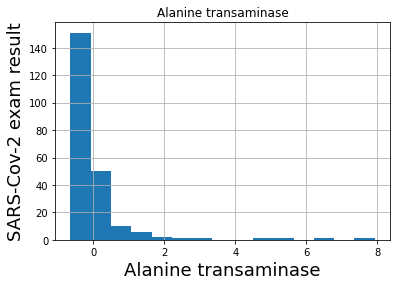

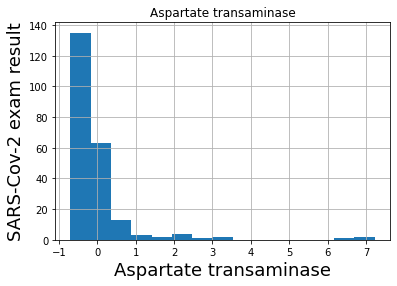

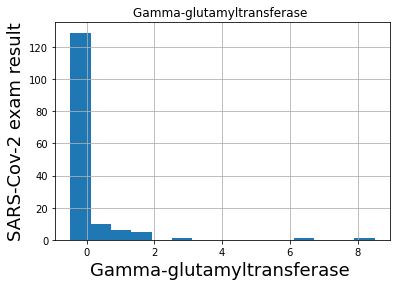

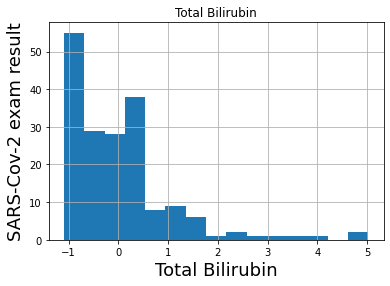

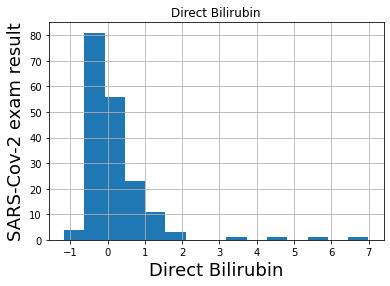

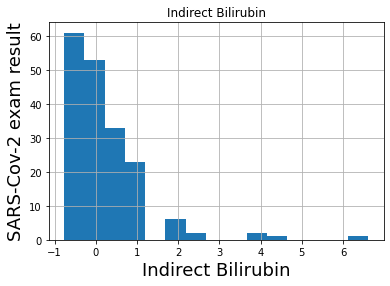

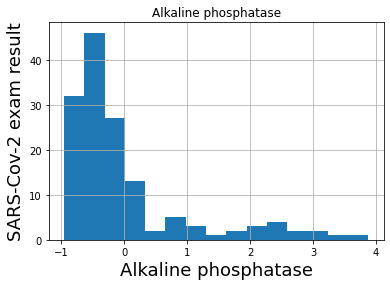

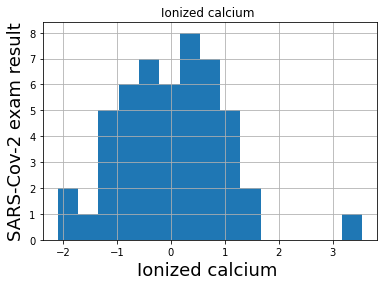

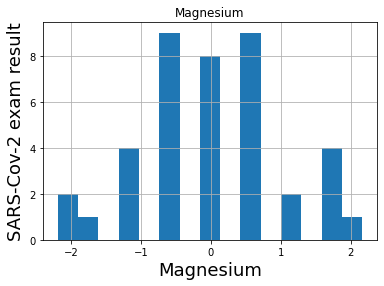

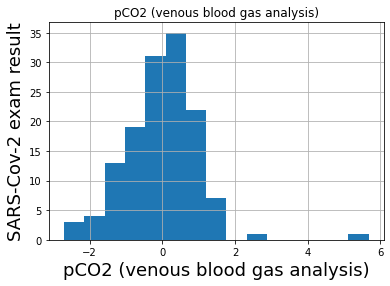

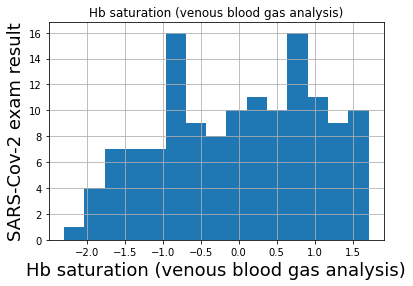

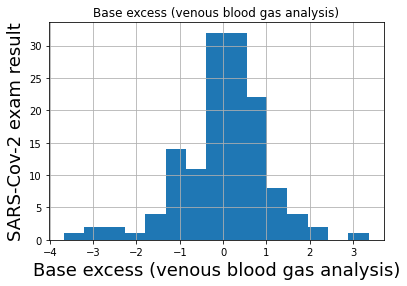

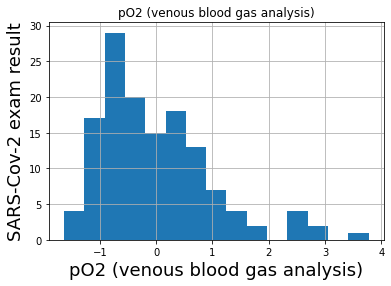

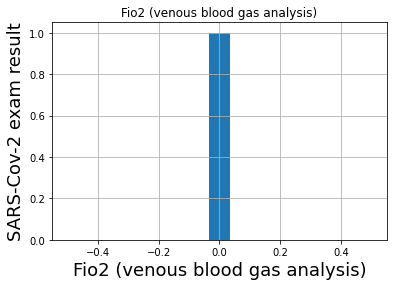

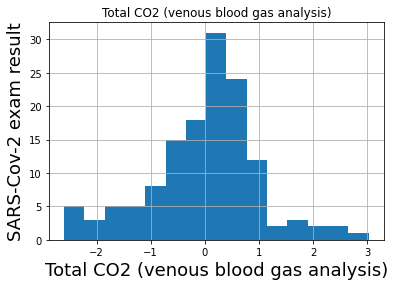

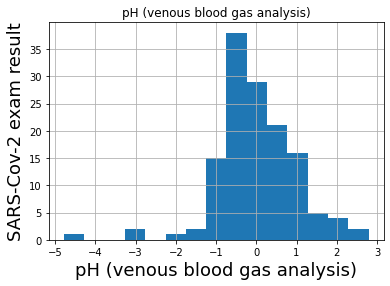

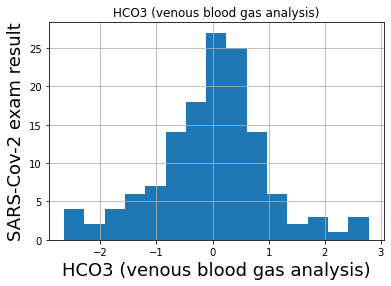

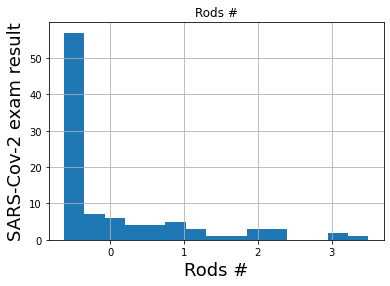

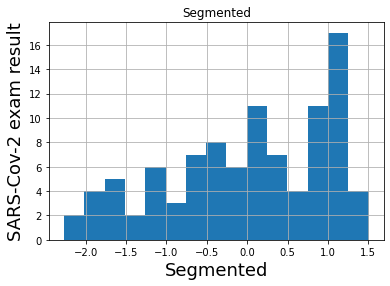

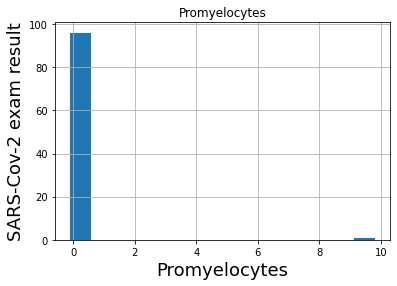

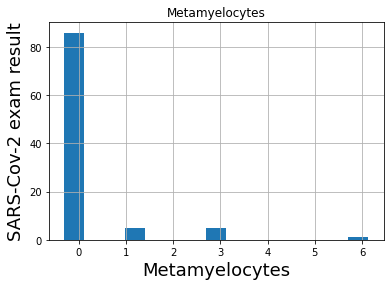

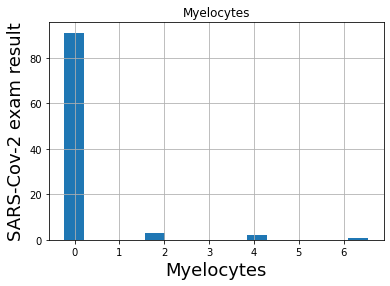

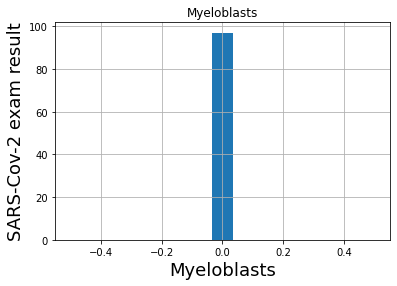

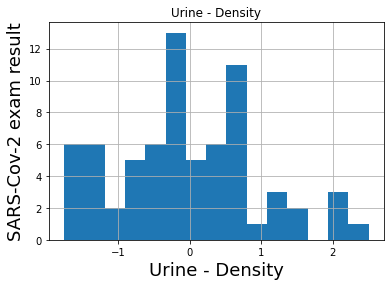

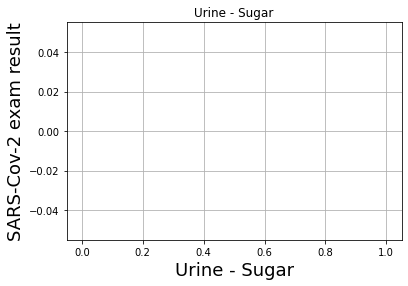

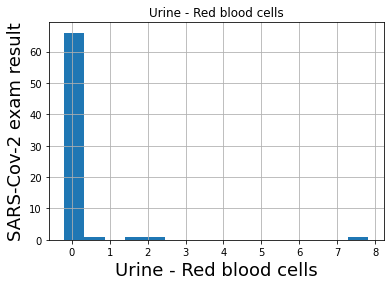

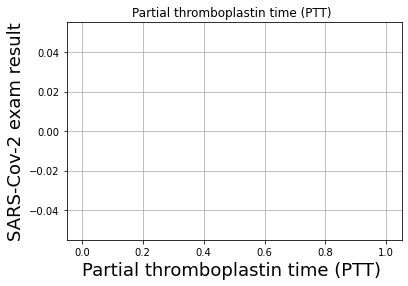

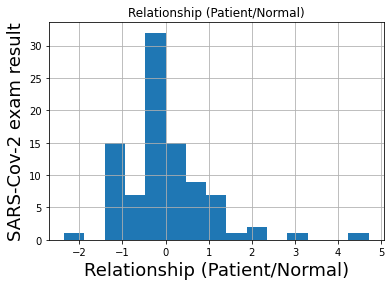

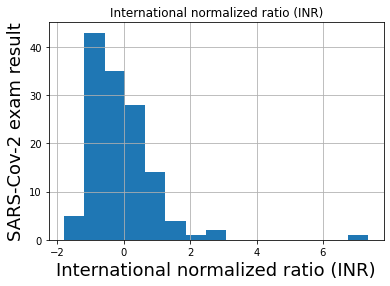

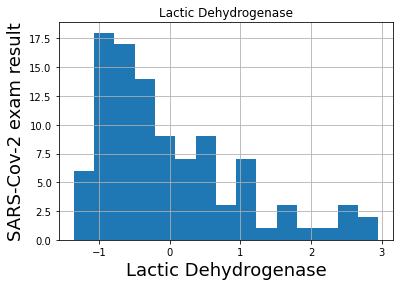

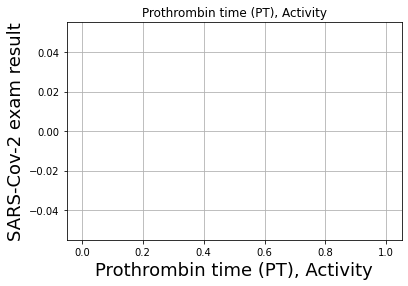

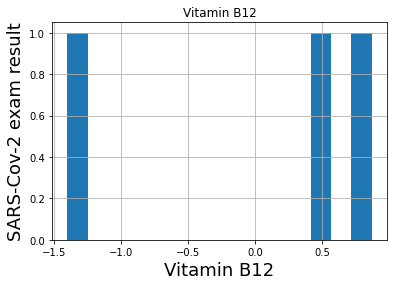

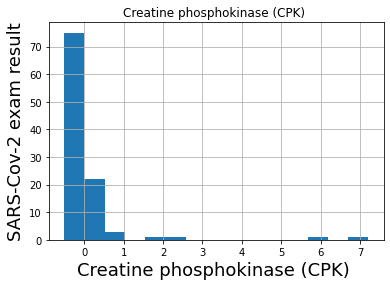

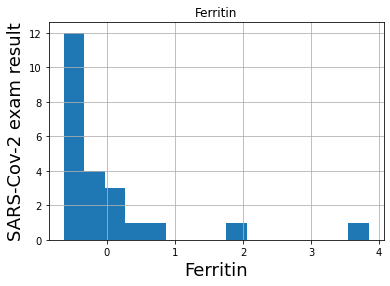

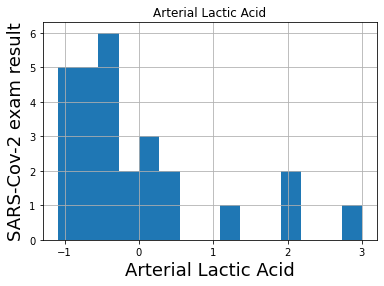

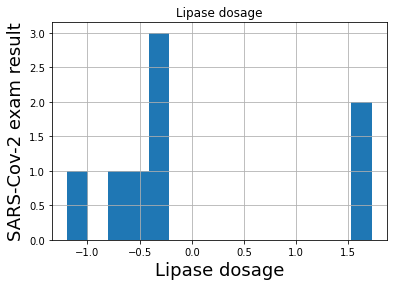

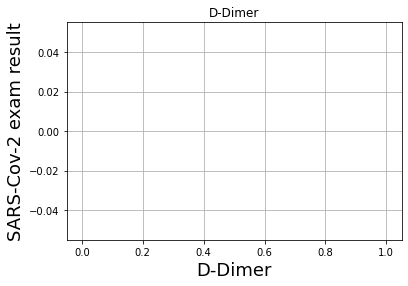

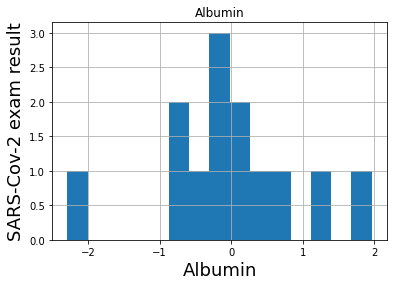

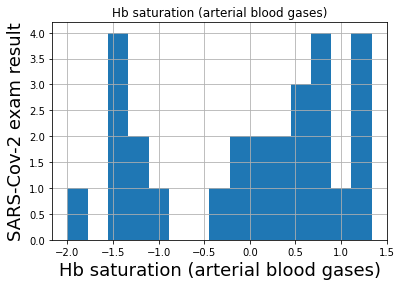

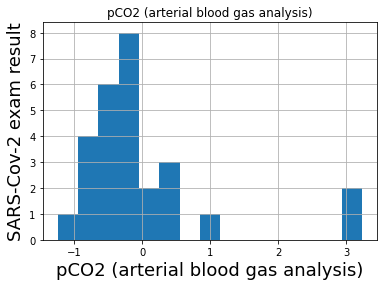

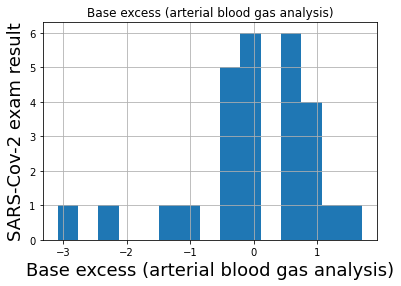

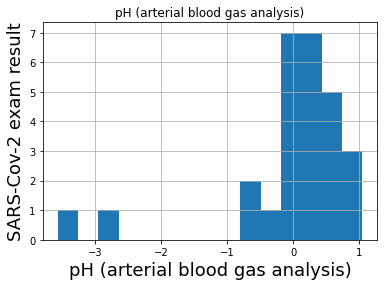

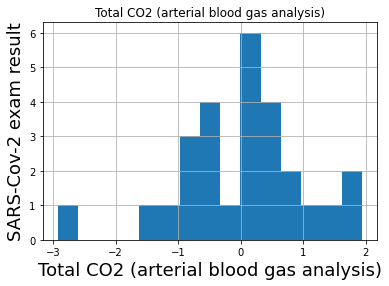

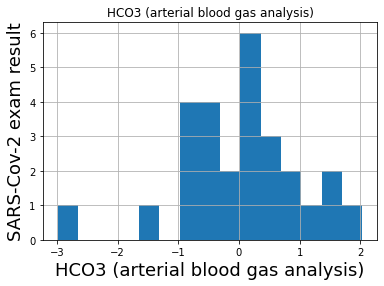

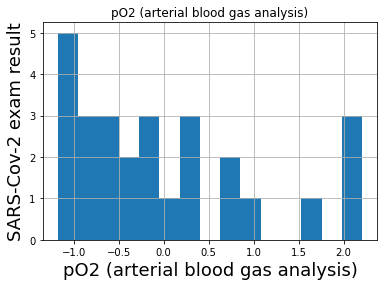

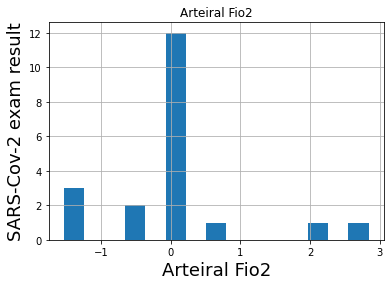

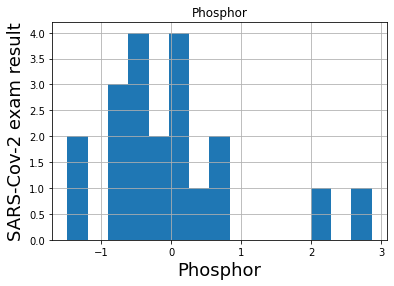

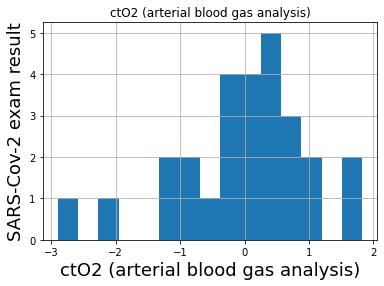

In [ ]:
# Relationship between numerical variables and the target variable _ NEW
for feature in numerical_variables:
    df1[feature].hist(bins=15)
    plt.xlabel(feature)
    plt.ylabel('SARS-Cov-2 exam result')
    plt.title(feature)
    plt.show()

FEATURE SELECTION 2:
We notice that there are 2 categories of festures. The first category consists of features that have a relationship with the target variable and the second category consists of features that have no relationship with the target variable. The second category consists of those 7 following features which are: -Mycoplasma pneumoniae, 
-Urine-Sugar, 
-Partial thromboplastin time (PTT), 
-Prothrombin time (PT) Activity 
-D-Dimer,
-Myeloblasts
-Fio2 (venous blood gas analysis).
As a result, they may not be taken into account in the construction of our model. They must be dropped.


In [ ]:
# FEATURE SELECTION 2
columns = ['Urine - Sugar', 'Mycoplasma pneumoniae', 'Partial thromboplastin time\xa0(PTT)\xa0','Prothrombin time (PT), Activity','D-Dimer','Fio2 (venous blood gas analysis)','Myeloblasts']
df1.drop(columns, inplace=True, axis=1)

#Categorical variables

In [ ]:
# Categorical features overview
categorical_feature=[feature for feature in df1.columns if df1[feature].dtypes=='O' ]
df1[categorical_feature].head()

SARS-Cov-2 exam result Respiratory Syncytial Virus   Influenza A  \
0               negative                         NaN           NaN   
1               negative                not_detected  not_detected   
2               negative                         NaN           NaN   
3               negative                         NaN           NaN   
4               negative                not_detected  not_detected   

    Influenza B Parainfluenza 1 CoronavirusNL63 Rhinovirus/Enterovirus  \
0           NaN             NaN             NaN                    NaN   
1  not_detected    not_detected    not_detected               detected   
2           NaN             NaN             NaN                    NaN   
3           NaN             NaN             NaN                    NaN   
4  not_detected    not_detected    not_detected               detected   

  Coronavirus HKU1 Parainfluenza 3 Chlamydophila pneumoniae    Adenovirus  \
0              NaN             NaN                      NaN           NaN   
1     not_detected    not_detected             not_detected  not_detected   
2              NaN             NaN                      NaN           NaN   
3              NaN             NaN                      NaN           NaN   
4     not_detected    not_detected             not_detected  not_detected   

  Parainfluenza 4 Coronavirus229E CoronavirusOC43 Inf A H1N1 2009  \
0             NaN             NaN             NaN             NaN   
1    not_detected    not_detected    not_detected    not_detected   
2             NaN             NaN             NaN             NaN   
3             NaN             NaN             NaN             NaN   
4    not_detected    not_detected    not_detected    not_detected   

  Bordetella pertussis Metapneumovirus Parainfluenza 2  \
0                  NaN             NaN             NaN   
1         not_detected    not_detected    not_detected   
2                  NaN             NaN             NaN   
3                  NaN             NaN             NaN   
4         not_detected    not_detected    not_detected   

  Influenza B, rapid test Influenza A, rapid test Strepto A Urine - Esterase  \
0                     NaN                     NaN       NaN              NaN   
1                negative                negative       NaN              NaN   
2                     NaN                     NaN       NaN              NaN   
3                     NaN                     NaN       NaN              NaN   
4                     NaN                     NaN       NaN              NaN   

  Urine - Aspect Urine - pH Urine - Hemoglobin Urine - Bile pigments  \
0            NaN        NaN                NaN                   NaN   
1            NaN        NaN                NaN                   NaN   
2            NaN        NaN                NaN                   NaN   
3            NaN        NaN                NaN                   NaN   
4            NaN        NaN                NaN                   NaN   

  Urine - Ketone Bodies Urine - Nitrite Urine - Urobilinogen Urine - Protein  \
0                   NaN             NaN                  NaN             NaN   
1                   NaN             NaN                  NaN             NaN   
2                   NaN             NaN                  NaN             NaN   
3                   NaN             NaN                  NaN             NaN   
4                   NaN             NaN                  NaN             NaN   

  Urine - Leukocytes Urine - Crystals Urine - Hyaline cylinders  \
0                NaN              NaN                       NaN   
1                NaN              NaN                       NaN   
2                NaN              NaN                       NaN   
3                NaN              NaN                       NaN   
4                NaN              NaN                       NaN   

  Urine - Granular cylinders Urine - Yeasts Urine - Color  
0                        NaN            NaN        

There are several categorical features. They'll need to be encoded before the computer processing. We notice that these categorical variables correspond to the viral tests.

In [ ]:
# Categorical variables values
for feature in df1[categorical_feature] :
    print(f'{feature :-<50} {df1[feature].unique()}')

SARS-Cov-2 exam result---------------------------- ['negative' 'positive']
Respiratory Syncytial Virus----------------------- [nan 'not_detected' 'detected']
Influenza A--------------------------------------- [nan 'not_detected' 'detected']
Influenza B--------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1----------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63----------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus---------------------------- [nan 'detected' 'not_detected']
Coronavirus HKU1---------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3----------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae-------------------------- [nan 'not_detected' 'detected']
Adenovirus---------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 4----------------------------------- [nan 'not_detected' 'detected']
Coronavirus2

FEATURE SELECTION 3:They are generally binary. Excepted 10 of them which have an only one category, or nan or nan equivalent category. So, they must be dropped because they have no effect on the target feature. Those feature are Parainfluenza 2, Urine - Hyaline cylinders, Urine - Granular cylinders, Urine - Yeasts, Urine-Esterase, Urine-Bile pigments,Urine-Ketone Bodies,Urine-Nitrite, Urine-Urobilinogen, Urine-Protein.
They must be dropped.

In [ ]:
# FEATURE SELECTION 3
columns = ['Parainfluenza 2', 'Urine - Hyaline cylinders', 'Urine - Granular cylinders','Urine - Yeasts','Urine - Esterase','Urine - Bile pigments','Urine - Ketone Bodies','Urine - Nitrite','Urine - Urobilinogen','Urine - Protein']
df1.drop(columns, inplace=True, axis=1)

df1.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0             NaN                    NaN              NaN             NaN   
1    not_detected               detected     no

In [ ]:
# New categorical features values
categorical_feature=[feature for feature in df1.columns if df1[feature].dtypes=='O' ]

for feature in df1[categorical_feature] :
    print(f'{feature :-<50} {df1[feature].unique()}')

SARS-Cov-2 exam result---------------------------- ['negative' 'positive']
Respiratory Syncytial Virus----------------------- [nan 'not_detected' 'detected']
Influenza A--------------------------------------- [nan 'not_detected' 'detected']
Influenza B--------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1----------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63----------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus---------------------------- [nan 'detected' 'not_detected']
Coronavirus HKU1---------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3----------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae-------------------------- [nan 'not_detected' 'detected']
Adenovirus---------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 4----------------------------------- [nan 'not_detected' 'detected']
Coronavirus2

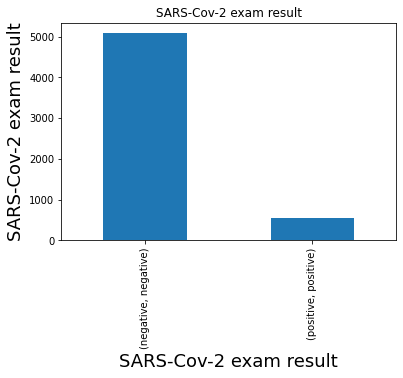

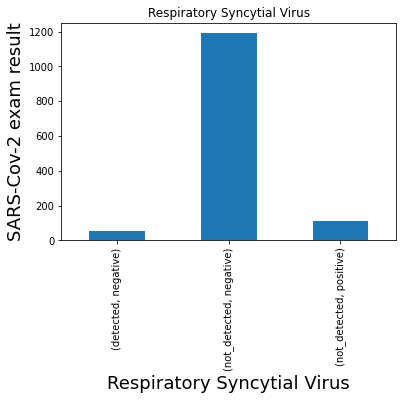

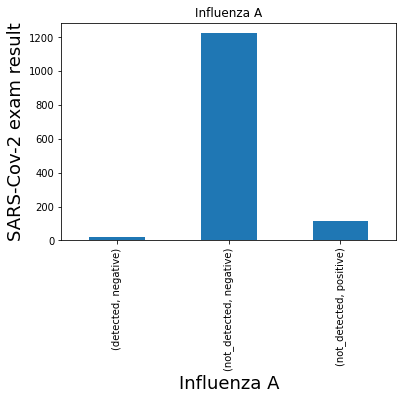

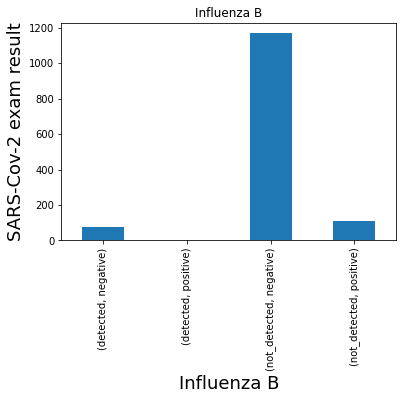

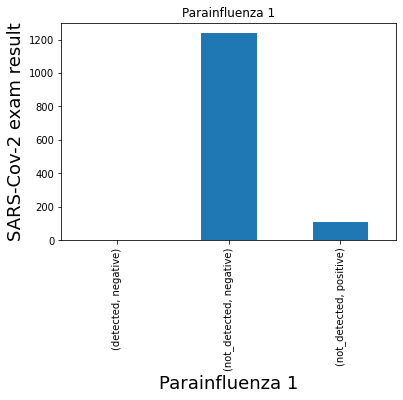

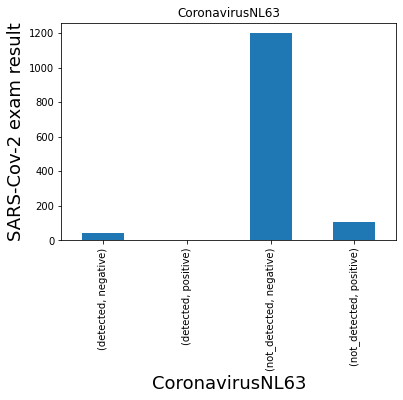

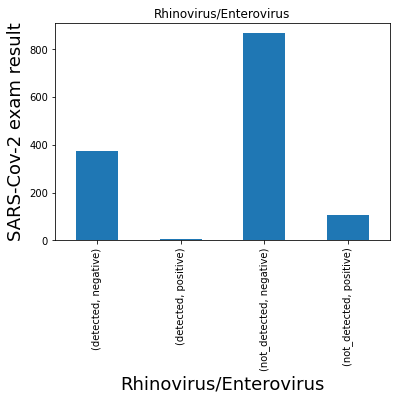

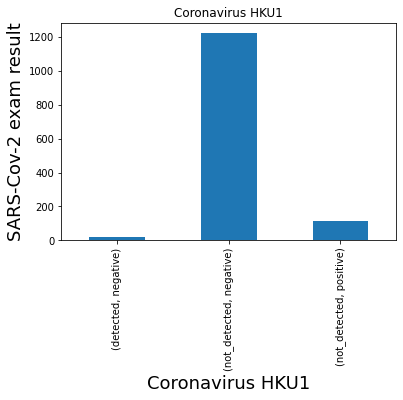

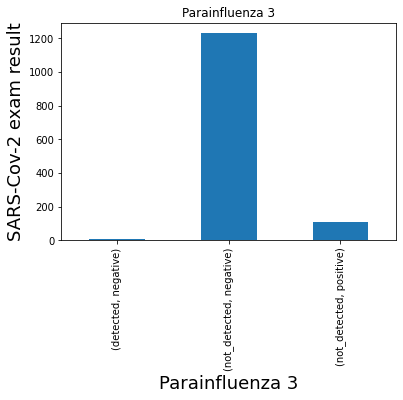

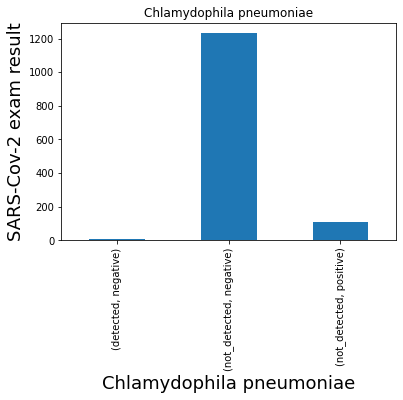

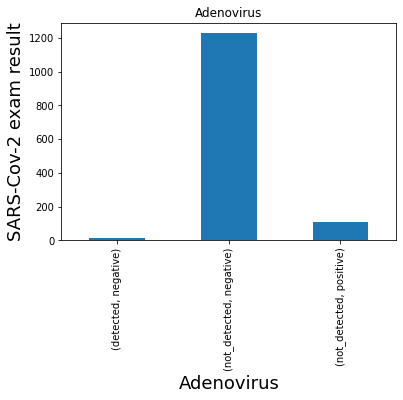

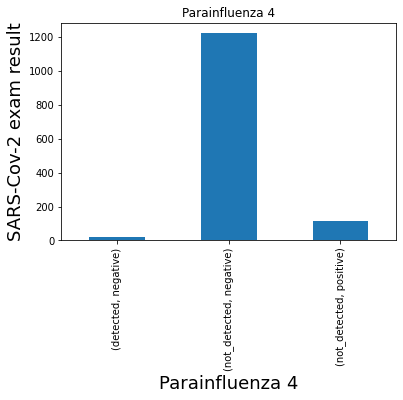

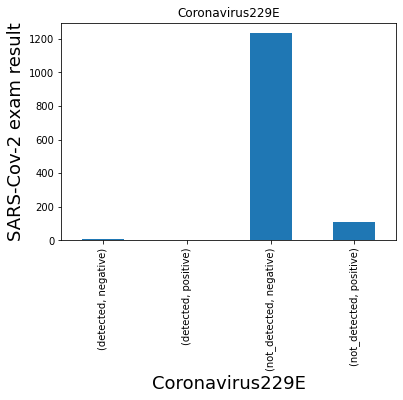

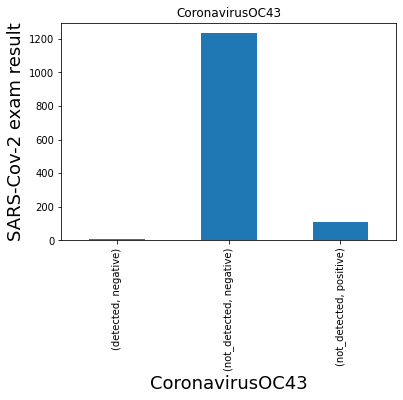

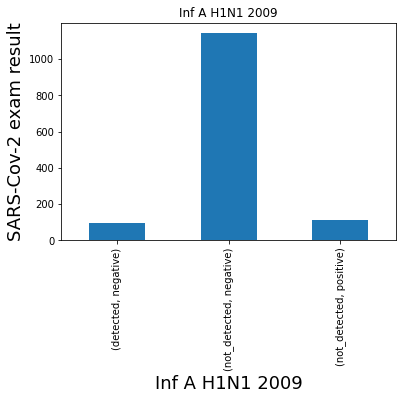

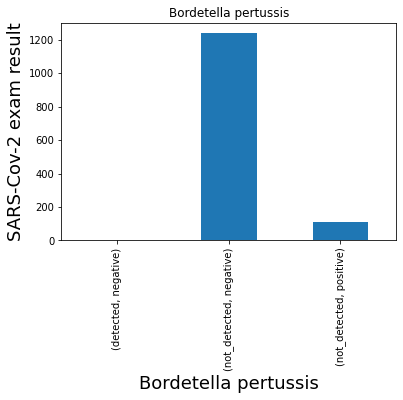

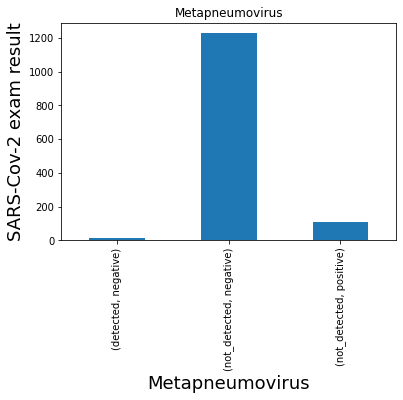

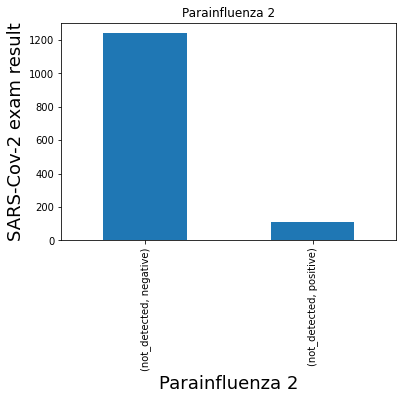

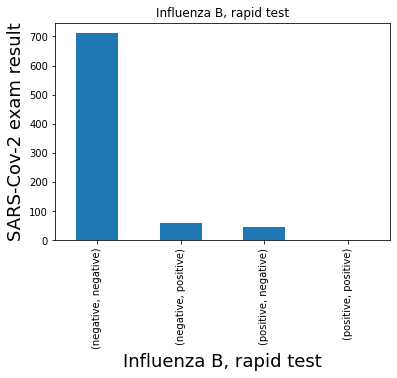

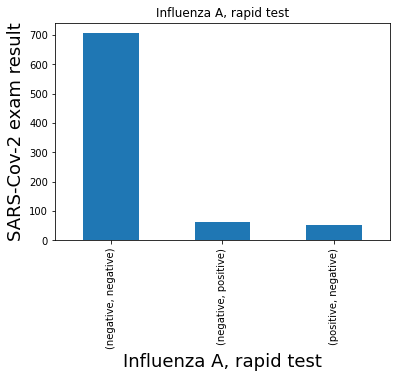

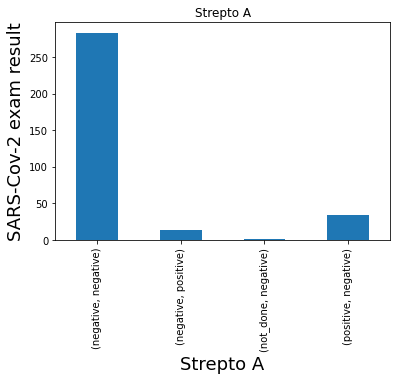

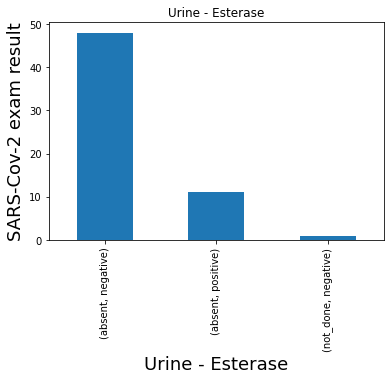

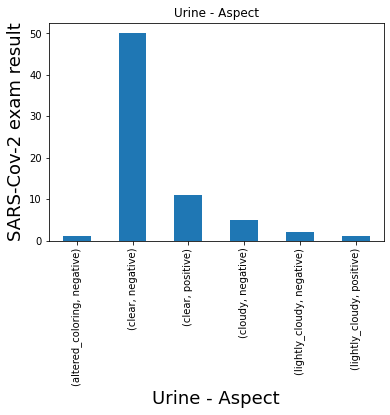

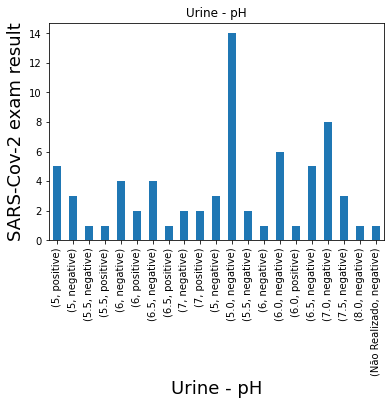

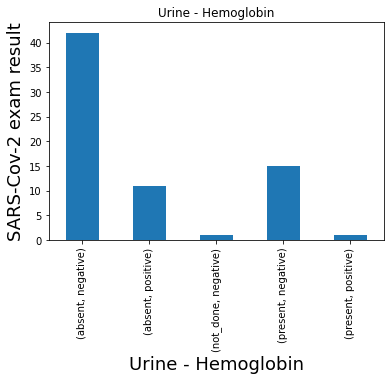

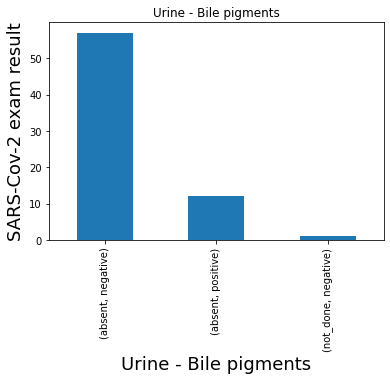

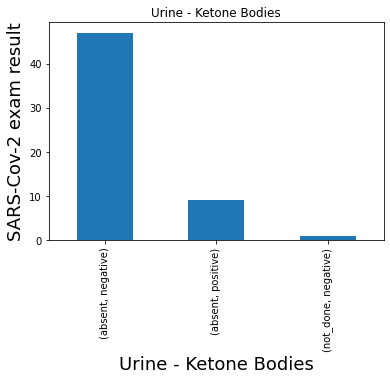

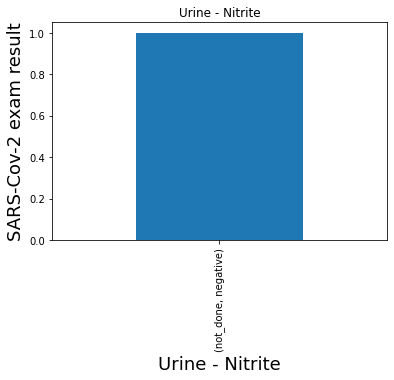

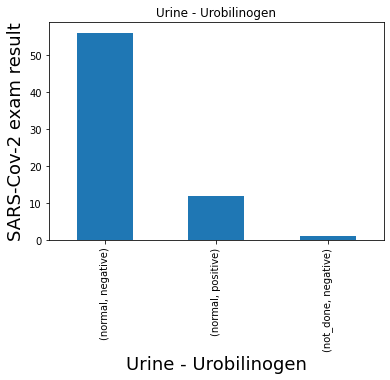

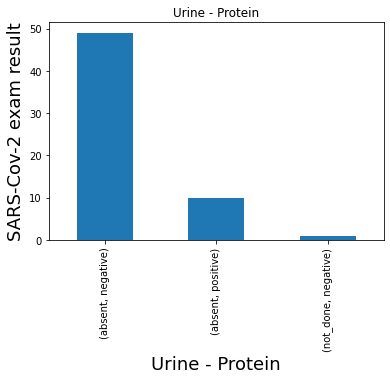

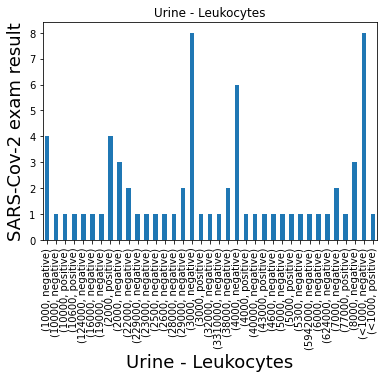

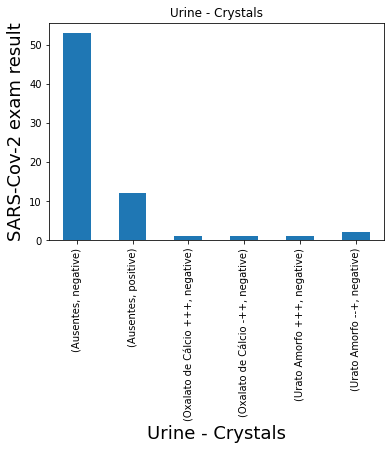

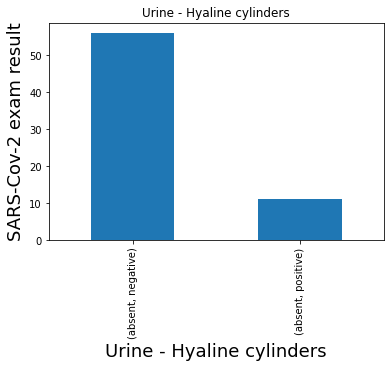

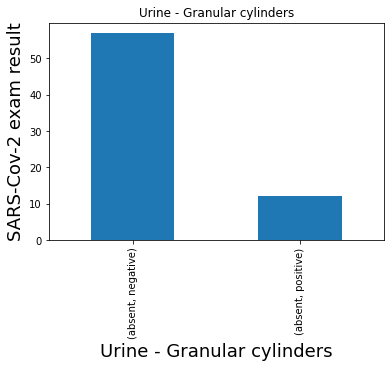

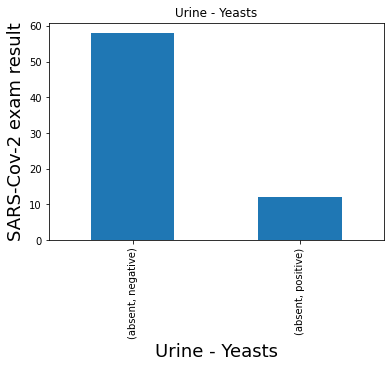

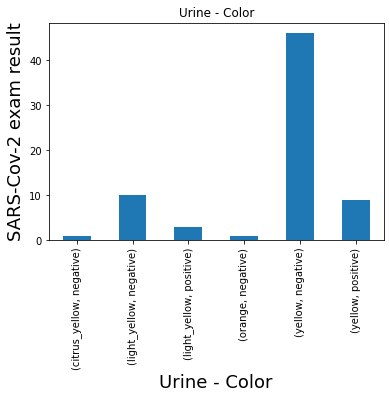

In [ ]:
# Relationship between categorical variables (viral tests) and the target variable (Covid-19)
#categorical_feature=df1[categorical_feature].drop(df1['Patient ID'],axis=1)
for feature in categorical_feature:
    data.groupby(feature)['SARS-Cov-2 exam result'].value_counts().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SARS-Cov-2 exam result')
    plt.title(feature)
    plt.show()

All the categorical features have a relationship with the target variable. So, the must all be taken in account for the model.

In [ ]:
# FEATURE SELECTION 4
# According to the litterature on internet, 'Influenza B, rapid test' and 'Influenza A, rapid test' are not reliable tests. Therefore, these 2 features must be removed.
columns = ['Influenza B, rapid test', 'Influenza A, rapid test']
df1.drop(columns, inplace=True, axis=1)

In [ ]:
# New dataset shape
df1.shape

(5644, 91)

# Missing values

In [ ]:
#Check if any null value is present
df1.isnull().values.any()

True

The mining of that result is that the dataset contains missing datas.
Therefore we must find the variables which contain those missing values.

In [ ]:
# Missing values rate per variable

(df1.isna().sum()/df1.shape[0]).sort_values(ascending=True) 

Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza A                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza B                                              0.760099
Coronavirus HKU1                                         0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydophila pneumoniae                                 0.760454
Parainfluenza 3                                          0.760454
Rhinovirus/Enterovirus                                   0.760454
Coronaviru

Missing values analysis revealed three groups of variables:
- Variables with 76% missing values;
- Variables with around 89% missing values;
- Variables with more than 90% missing values.




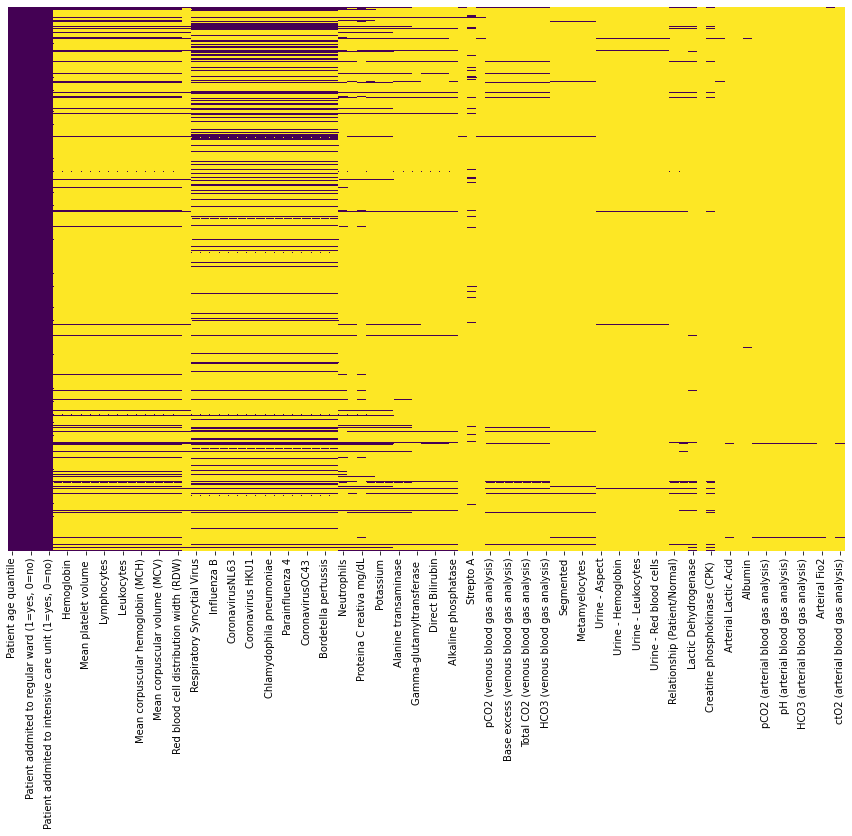

In [ ]:
# Plotting missing values
plt.figure(figsize=(15,10))
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Yellow spaces represente missing values. The 3 first features which are Patient age quantile,Patient addmited to regular ward and Patient addmited to semi-intensive unit have no missing values. The following variables are those with around 89% missing values. Then we have the variables with 76% missing values. Finally, those with at least 90% missing values.

Also, a search on the internet allows us to discover that :
- the variables that have 76% of missing values correspond to viral tests;
- The variables that have around 89% of missing values correspond to blood tests. 

ASSUMPTION 1: We will retain only these 2 groups of variables, the target variable and the patient age quantile to build our model.

# Examination of the target variable

In [ ]:
# Number of target variable classes

df1['SARS-Cov-2 exam result'].value_counts()

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

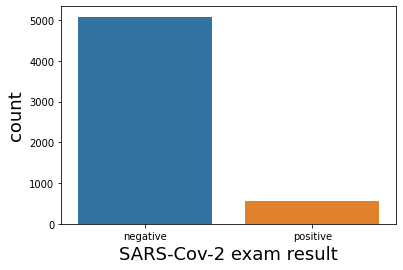

In [ ]:
#Visualization of the target variable

sns.countplot(x='SARS-Cov-2 exam result',data=df1)

In [ ]:
# Percentage of the target variable classes 

df1['SARS-Cov-2 exam result'].value_counts(normalize=True)

negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

The dataset is unbalanced because 90% of observations concern negative class (0) and 10% concern positive class.

# Nature of imbalance
5086/558 = 9.11 
So, the dataset is highly imbalanced

# 2. DATA PRE-PROCESSING PART 2

#Feature selection 5

In [ ]:
# Missing values rate calculation
missing_rate = df1.isna().sum()/df1.shape[0]

In [ ]:
# Creating the two groups of variables
blood_columns = list(df1.columns[(missing_rate < 0.9) & (missing_rate >0.88)])
viral_columns = list(df1.columns[(missing_rate < 0.88) & (missing_rate > 0.75)])

In [ ]:
# The two other relevant variables
key_columns = ['Patient age quantile', 'SARS-Cov-2 exam result']

In [ ]:
# Creating the final model dataset
df1 = df1[key_columns + blood_columns + viral_columns]
df1.head()

Patient age quantile SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                    13               negative         NaN         NaN   
1                    17               negative    0.236515    -0.02234   
2                     8               negative         NaN         NaN   
3                     5               negative         NaN         NaN   
4                    15               negative         NaN         NaN   

   Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0        NaN                    NaN              NaN          NaN   
1  -0.517413               0.010677         0.102004     0.318366   
2        NaN                    NaN              NaN          NaN   
3        NaN                    NaN              NaN          NaN   
4        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2                    NaN              NaN             NaN   
3                    NaN              NaN             NaN   
4               detected     not_detected    not_detected   

  Chlamydophila pneumoniae    Adenovirus Parainfluenza 4 Coronavirus229E  \
0                      NaN           NaN             NaN             NaN   
1             not_detected  not_detected    not_detected    not_detected   
2                      NaN           NaN             NaN             NaN   
3                      NaN           NaN             NaN             NaN   
4             not_detected  not_detected    not_detected    not_detected   

  CoronavirusOC43 Inf A H1N1 2009 Bordetella pertussis Metapneumovirus  
0             NaN             NaN                  NaN             NaN  
1    not_detected    not_detected         not_detected    not_detected  
2             NaN             NaN                  NaN             NaN  
3             NaN             NaN                  NaN             NaN  
4    not_detected    not_detected         not_d

In [ ]:
# Encoding
def encoding(df):
    code = {'negative':0,
            'positive':1,
            'not_detected':0,
            'detected':1}
    
    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)
        
    return df

In [ ]:
df1=encoding(df1)
df1.head()

Patient age quantile  SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                    13                       0         NaN         NaN   
1                    17                       0    0.236515    -0.02234   
2                     8                       0         NaN         NaN   
3                     5                       0         NaN         NaN   
4                    15                       0         NaN         NaN   

   Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0        NaN                    NaN              NaN          NaN   
1  -0.517413               0.010677         0.102004     0.318366   
2        NaN                    NaN              NaN          NaN   
3        NaN                    NaN              NaN          NaN   
4        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Respiratory Syncytial Virus  \
0                                      NaN                          NaN   
1                                -0.625073                          0.0   
2                                      NaN                          NaN   
3                                      NaN                          NaN   
4                                      NaN                          0.0   

   Influenza A  Influenza B  Parainfluenza 1  CoronavirusNL63  \
0          NaN          NaN              NaN              NaN   
1          0.0          0.0              0.0              0.0   
2          NaN          NaN              NaN              NaN   
3          NaN          NaN              NaN              NaN   
4          0.0          0.0              0.0              0.0   

   Rhinovirus/Enterovirus  Coronavirus HKU1  Parainfluenza 3  \
0                     NaN               NaN              NaN   
1                     1.0               0.0              0.0   
2                     NaN               NaN              NaN   
3                     NaN               NaN              NaN   
4                     1.0               0.0              0.0   

   Chlamydophila pneumoniae  Adenovirus  Parainfluenza 4  Coronavirus229E  \
0                       NaN         NaN              NaN              NaN   
1                       0.0         0.0              0.0              0.0   
2                       NaN         NaN              NaN              NaN   
3                       NaN         NaN              NaN              NaN   
4                       0.0         0.0              0.0              0.0   

   CoronavirusOC43  Inf A H1N1 2009  Bordetella pertussis  Metapneumovirus  
0              NaN              NaN                   NaN              NaN  
1              0.0              0.0                   0.0              0.0  
2              NaN              NaN                   NaN              NaN  
3              NaN              NaN                   NaN           

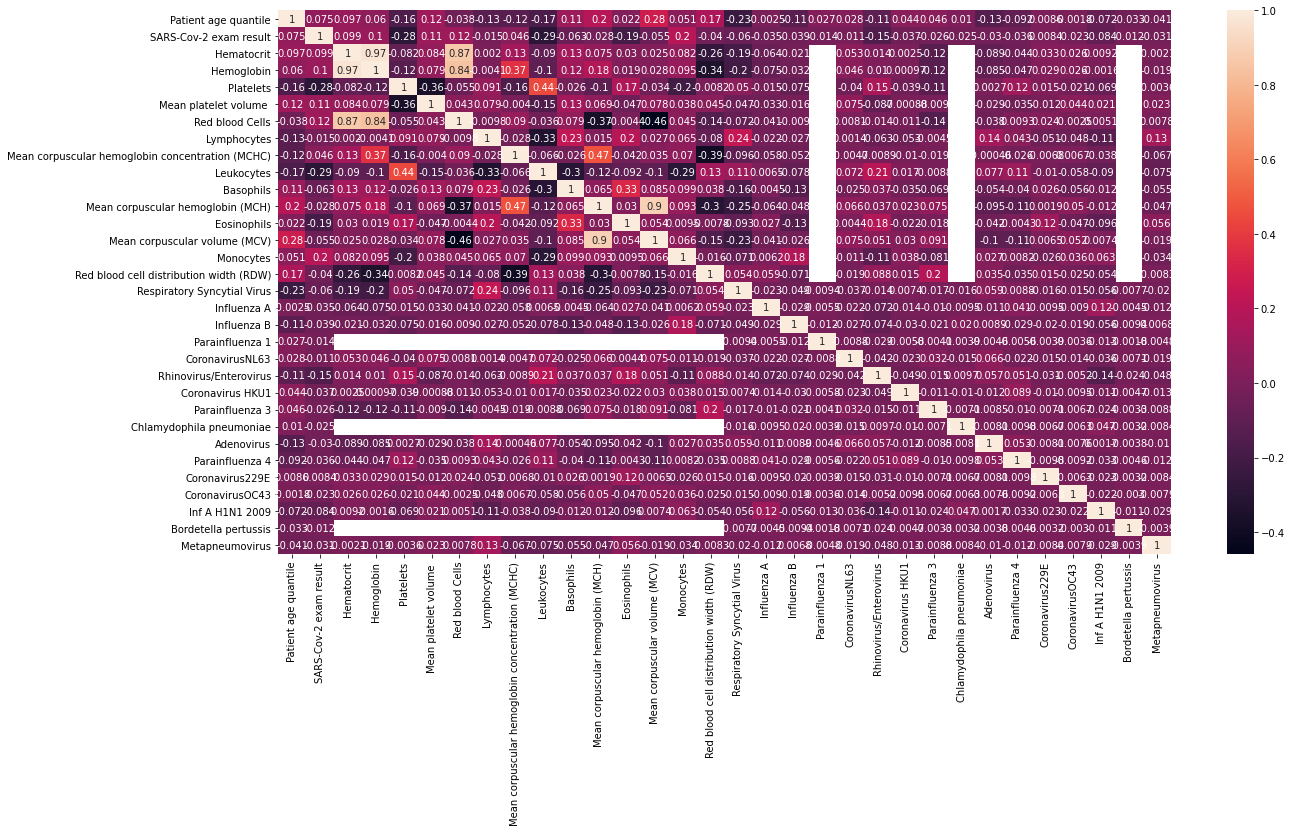

In [ ]:
# Numerical variables correlation
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(), annot = True)

Hematocrit-Hemoglobin (0.97) and Mean corpuscular hemoglobin (MCH)-Mean corpuscular volume (MCV) (0.9) are highly correlated. Since Hemoglobin and MCV are higher correlated with the target feature, we keep them and we drop Hematocrit and MCH 

In [ ]:
# FEATURE SELECTION 6
#Suppression des colonnes
columns = ['Hematocrit', 'Mean corpuscular hemoglobin (MCH)']
df1.drop(columns, inplace=True, axis=1)

In [ ]:
df1.shape

(5644, 30)

ASSUMPTION 2: We set a threshold of non-missing values per line at two thirds of the number of predictor variables (30). This makes a threshold of 20 (30*2/3) non-missing values.

In [ ]:
# FEATURE SELECTION 7
df1 = df1.dropna(axis=0, thresh=20)
df1.shape

(366, 30)

In [ ]:
# New distribution of the target variable 

df1['SARS-Cov-2 exam result'].value_counts()

0    314
1     52
Name: SARS-Cov-2 exam result, dtype: int64

# New data imbalance rate
314/52=6.03. The dataset is no more highly imbalanced. It's just imbalanced.

# Train dataset - Test dataset

In [ ]:
# Train dataset - test dataset split-USE CROSS VALIDATION

from sklearn.model_selection import train_test_split
trainset,testset=train_test_split(df1,test_size=0.2,random_state=0)

In [ ]:
# Verification of the number of target class in the train dataset 

trainset['SARS-Cov-2 exam result'].value_counts()

0    248
1     44
Name: SARS-Cov-2 exam result, dtype: int64

In [ ]:
# Train dataset  target class rate

trainset['SARS-Cov-2 exam result'].value_counts(normalize=True)

0    0.849315
1    0.150685
Name: SARS-Cov-2 exam result, dtype: float64

In [ ]:
# Verification of the number of target class in the test dataset  

testset['SARS-Cov-2 exam result'].value_counts()

0    66
1     8
Name: SARS-Cov-2 exam result, dtype: int64

In [ ]:
# Test dataset  target class rate

testset['SARS-Cov-2 exam result'].value_counts(normalize=True)

0    0.891892
1    0.108108
Name: SARS-Cov-2 exam result, dtype: float64

The train dataset and test dataset both have 90% of negative target class and 10% of positive target class

# Encoding - Missing values handling

In [ ]:
# Missforest imputation procedure
def imputation2(df):
    imputer = MissForest()
    df_array= imputer.fit_transform(df)
    df = pd.DataFrame(df_array, columns=df.columns, index=df.index)
    return  df

In [ ]:
def preprocessing2(df):
    df = imputation2(df)
    
    X = df.drop('SARS-Cov-2 exam result', axis=1)
    y = df['SARS-Cov-2 exam result']
    
    print(y.value_counts())
    
    return X, y

In [ ]:
# Train dataset preprocessing
x_train,y_train=preprocessing2(trainset)

Iteration: 0
Iteration: 1
Iteration: 2
0.0    248
1.0     44
Name: SARS-Cov-2 exam result, dtype: int64


In [ ]:
# Test dataset preprocessing
x_test, y_test = preprocessing2(testset)

0.0    66
1.0     8
Name: SARS-Cov-2 exam result, dtype: int64


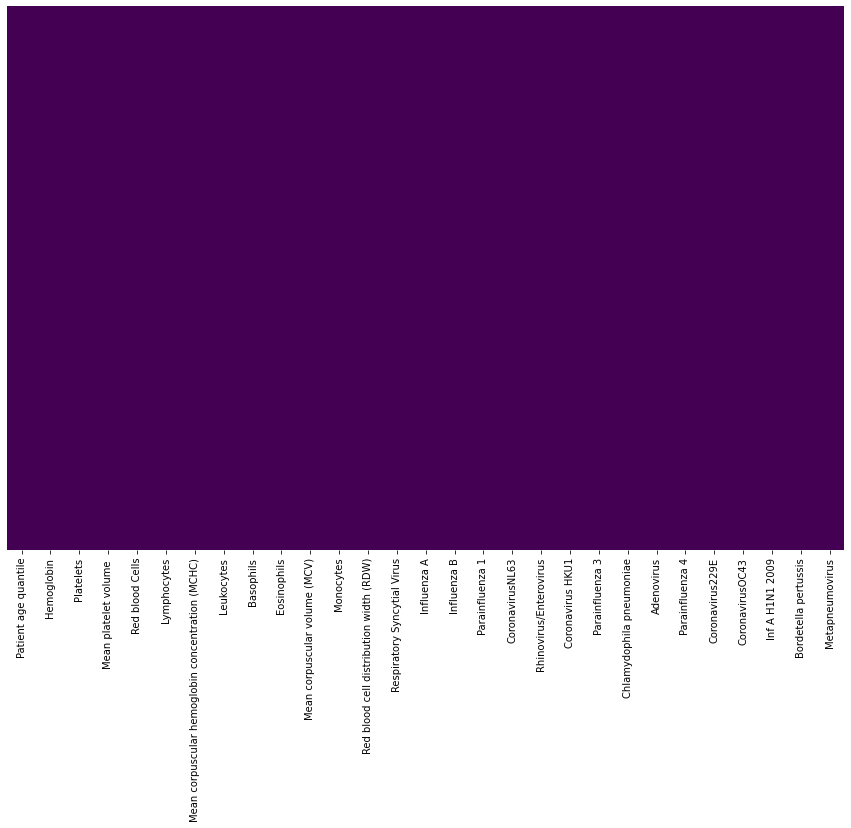

In [ ]:
# New plotting of missing values
df=x_train + x_test
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

There is no longer missing values

# 3. MODEL BUILDING

## Librairies

In [ ]:
# loading librairies 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from xgboost import XGBClassifier

# List of models

We have a classification problem. So we will try different classification algorithms and choose the best. The classification algorithms we will use are:
 - A common binary classification algorithm: Logistic Regression
 - An effective algorithm on small datasets: SVM 
 - A bagging algorithm: Random Forest
 - A boosting algorithm: AdaBoost, XGBoost

# Model creation

In [ ]:
# A pipeline for feature engineering

preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

In [ ]:
# A pipeline for each model creation

LogisticRegression = make_pipeline(preprocessor, StandardScaler(), LogisticRegression(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0,probability=True))
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
XGBoost= make_pipeline(preprocessor, XGBClassifier(random_state=0))

# Learning and evaluation procedure

In [ ]:
# Libraries import
from sklearn.metrics import f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import learning_curve

In [ ]:
# procedure for confusion matrix, f1 score and diagnostic curve code

def evaluation(model):
    
    model.fit(x_train, y_train)
    ypred = model.predict(x_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, x_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

In [ ]:
# A dictionary for all models

dict_of_models = {'LogisticRegression':LogisticRegression,
                  'SVM': SVM,
                  'RandomForest': RandomForest,
                  'AdaBoost' : AdaBoost,
                  'XGBoost' : XGBoost
                 }

LogisticRegression
[[64  2]
 [ 3  5]]
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96        66
         1.0       0.71      0.62      0.67         8

    accuracy                           0.93        74
   macro avg       0.83      0.80      0.81        74
weighted avg       0.93      0.93      0.93        74

SVM
[[65  1]
 [ 3  5]]
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        66
         1.0       0.83      0.62      0.71         8

    accuracy                           0.95        74
   macro avg       0.89      0.80      0.84        74
weighted avg       0.94      0.95      0.94        74

RandomForest
[[64  2]
 [ 2  6]]
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        66
         1.0       0.75      0.75      0.75         8

    accuracy                           0.95        74
   macro avg       0.86      0.86  

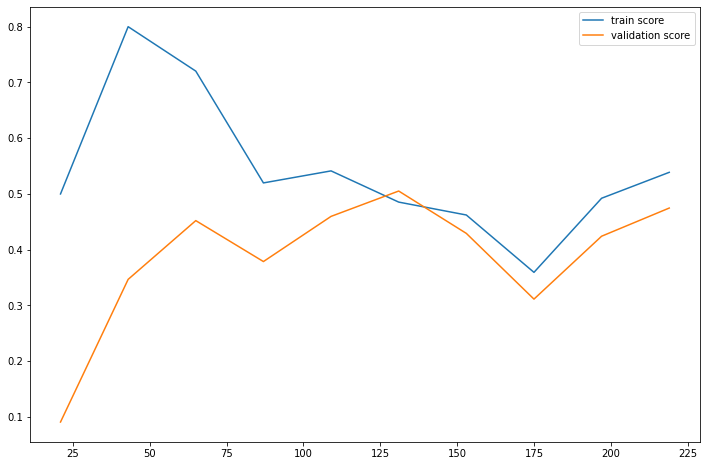

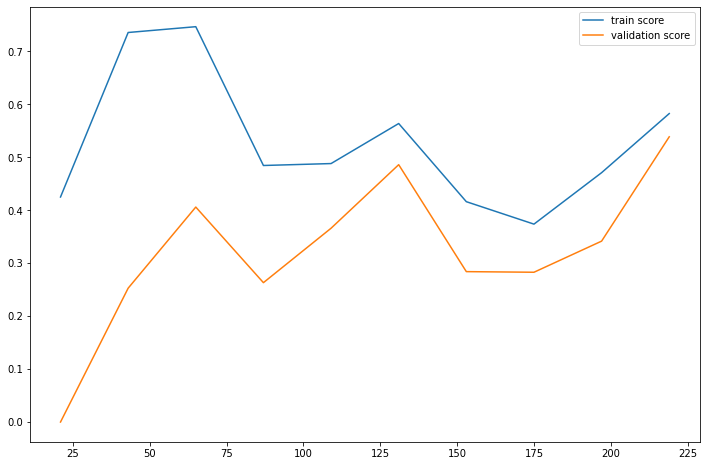

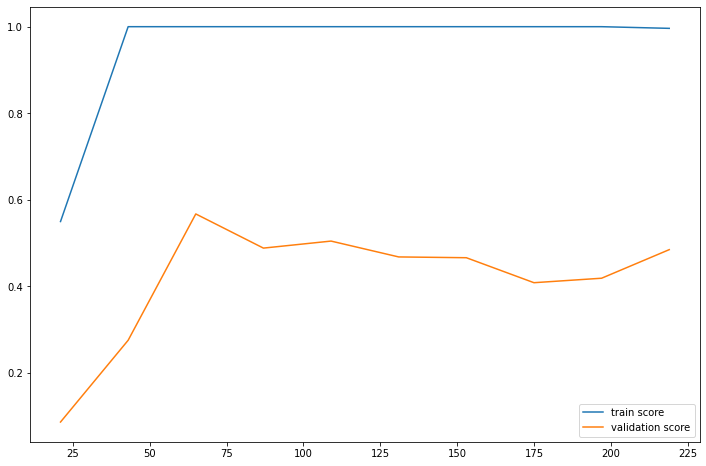

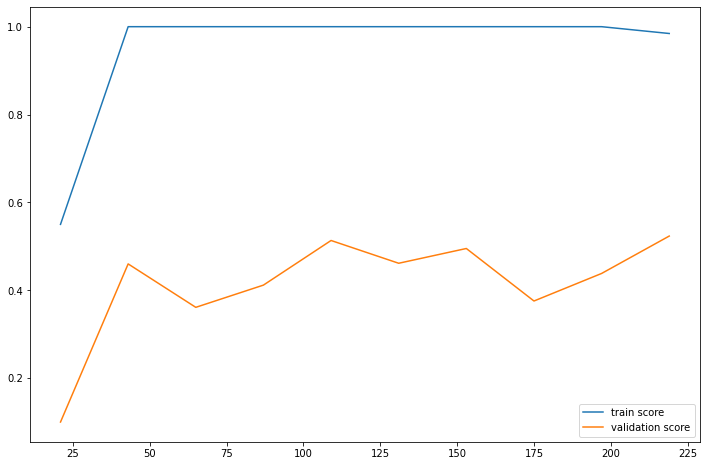

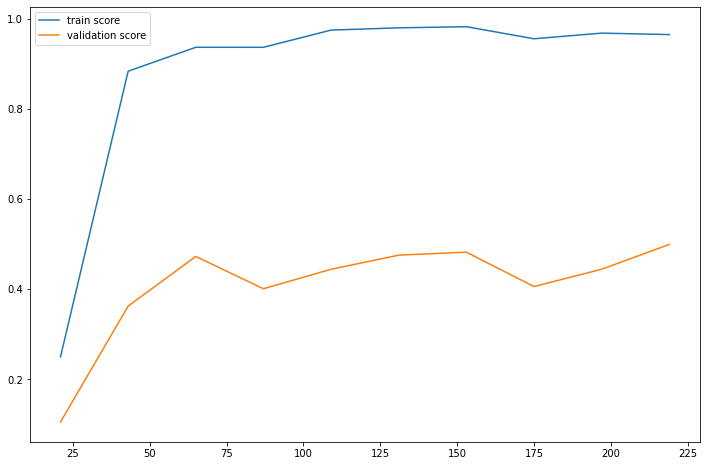

In [ ]:
# Models evaluation

for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

In [ ]:
# ROC Curve procedure code
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange', label='Courbe ROC(AUC=%.2f)'%auc)
    plt.plot([0,1],[0,1], color='darkblue',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Courbe ROC')
    plt.legend(loc='lower right')
    plt.show()


LogisticRegression
AUC: 0.95


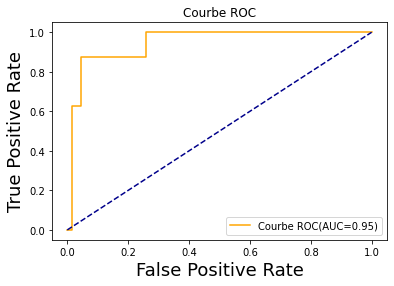

SVM
AUC: 0.96


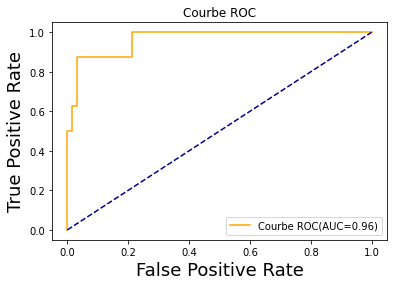

RandomForest
AUC: 0.96


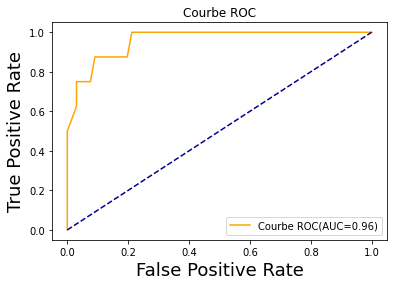

AdaBoost
AUC: 0.95


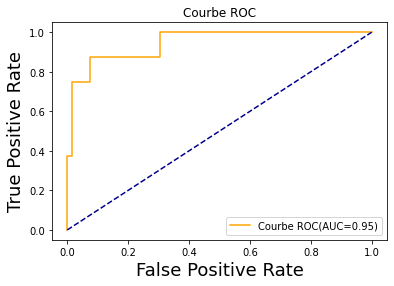

XGBoost
AUC: 0.97


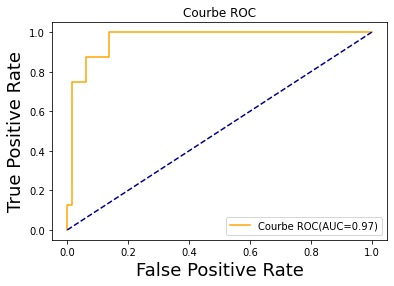

In [ ]:
# Models evaluation with ROC curve and AUC

for name, model in dict_of_models.items():
    print(name)
    probs=model.predict_proba(x_test)
    probs = probs[:, 1]
    auc = roc_auc_score(y_test, probs)
    print('AUC: %.2f' % auc)
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    plot_roc_curve(fpr, tpr)

# Choice of the best model

Since the dataset is unbalanced, we'll use the f1_score AUC as metric to compare 
the different models.
Taking into account these metrics and the learning and evaluation curves, we choose SVM as the best model.

# 4. OPTIMIZATION

In [ ]:
# Librairy import
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
SVM

Pipeline(memory=None,
         steps=[('pipeline',
                 Pipeline(memory=None,
                          steps=[('polynomialfeatures',
                                  PolynomialFeatures(degree=2,
                                                     include_bias=False,
                                                     interaction_only=False,
                                                     order='C')),
                                 ('selectkbest',
                                  SelectKBest(k=10,
                                              score_func=<function f_classif at 0x7f9bec309a70>))],
                          verbose=False)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel

In [ ]:
# RandomizedSearchCV use
# Hyperparameters dictionary creation
# RandomizedSearchCV object Creation

hyper_params = {'svc__gamma':[0.0001,0.0002,0.0003,0.0004,0.0005],
                'svc__C':[1, 10, 100, 1000,4000], 
               'pipeline__polynomialfeatures__degree':[2, 5],
               'pipeline__selectkbest__k': range(45, 60)}
grid = RandomizedSearchCV(SVM, hyper_params, scoring='recall', cv=4,
                          n_iter=100)



In [ ]:
# RandomizedSearchCv training
grid.fit(x_train, y_train)

# Best hyperparameters display
print(grid.best_params_)

# Prediction vector creation
y_pred = grid.predict(x_test)

# Evaluation 
print(classification_report(y_test, y_pred))

{'svc__gamma': 0.0001, 'svc__C': 1000, 'pipeline__selectkbest__k': 50, 'pipeline__polynomialfeatures__degree': 2}
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98        66
         1.0       0.86      0.75      0.80         8

    accuracy                           0.96        74
   macro avg       0.91      0.87      0.89        74
weighted avg       0.96      0.96      0.96        74



[[65  1]
 [ 2  6]]
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98        66
         1.0       0.86      0.75      0.80         8

    accuracy                           0.96        74
   macro avg       0.91      0.87      0.89        74
weighted avg       0.96      0.96      0.96        74



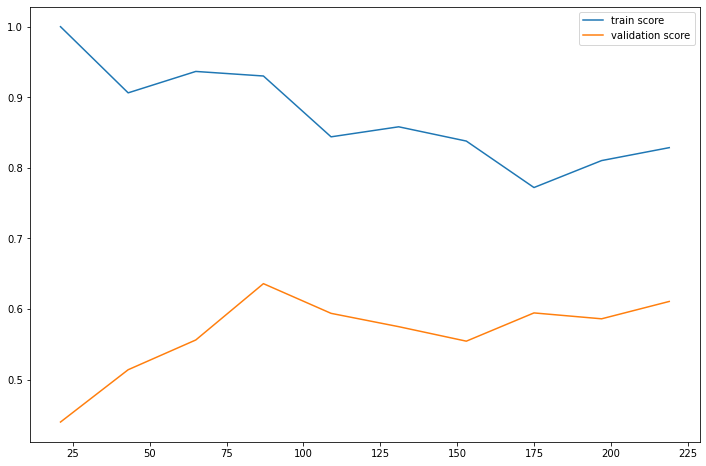

In [ ]:
evaluation(grid.best_estimator_)

In [ ]:
hyper_params = {'svc__gamma':[0.0001,0.0002,0.0003,0.0004,0.0005],
                'svc__C':[1, 10, 100, 1000,4000], 
               'pipeline__polynomialfeatures__degree':[2, 5],
               'pipeline__selectkbest__k': range(40, 60)}
grid2 = RandomizedSearchCV(SVM, hyper_params, scoring='roc_auc', cv=4,
                          n_iter=100)

In [ ]:
# RandomizedSearchCv training
grid2.fit(x_train, y_train)

RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('pipeline',
                                              Pipeline(memory=None,
                                                       steps=[('polynomialfeatures',
                                                               PolynomialFeatures(degree=2,
                                                                                  include_bias=False,
                                                                                  interaction_only=False,
                                                                                  order='C')),
                                                              ('selectkbest',
                                                               SelectKBest(k=10,
                                                                           score_func=<function f_classif at 0x7f9bec309a70>))],
             

AUC: 0.99


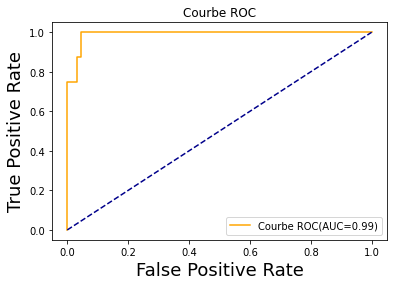

In [61]:
# Models evaluation with ROC curve and AUC
probs=grid2.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

# UTILISATION DE SMOTE

In [62]:
# implementing SMOTE
from imblearn.over_sampling import SMOTE

In [63]:
# Creating SMOTE object
smote=SMOTE()

In [64]:
x_train_smote,y_train_smote=smote.fit_sample(x_train,y_train)

In [65]:
# Shape verification
from collections import Counter
print("Before SMOTE: ", Counter(y_train))
print("After SMOTE: ", Counter(y_train_smote))

Before SMOTE:  Counter({0.0: 248, 1.0: 44})
After SMOTE:  Counter({0.0: 248, 1.0: 248})


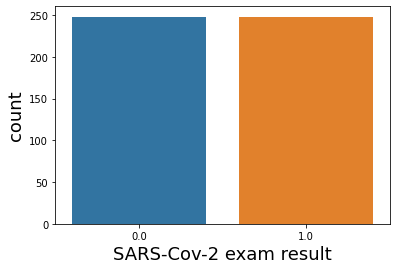

In [66]:
#Visualization of the target variable after SMOTE
df_smote=pd.DataFrame(y_train_smote, columns=['SARS-Cov-2 exam result'])
sns.countplot(x='SARS-Cov-2 exam result',data=df_smote)

In [67]:
# Procedure code

def evaluation_smote(model):
    
    model.fit(x_train_smote, y_train_smote)
    ypred = model.predict(x_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, x_train_smote, y_train_smote,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

LogisticRegression
[[58  8]
 [ 1  7]]
              precision    recall  f1-score   support

         0.0       0.98      0.88      0.93        66
         1.0       0.47      0.88      0.61         8

    accuracy                           0.88        74
   macro avg       0.72      0.88      0.77        74
weighted avg       0.93      0.88      0.89        74

SVM
[[60  6]
 [ 0  8]]
              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95        66
         1.0       0.57      1.00      0.73         8

    accuracy                           0.92        74
   macro avg       0.79      0.95      0.84        74
weighted avg       0.95      0.92      0.93        74

RandomForest
[[62  4]
 [ 1  7]]
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96        66
         1.0       0.64      0.88      0.74         8

    accuracy                           0.93        74
   macro avg       0.81      0.91  

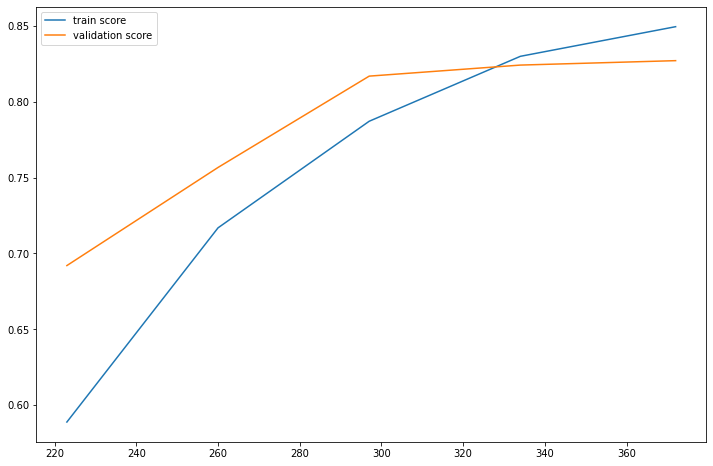

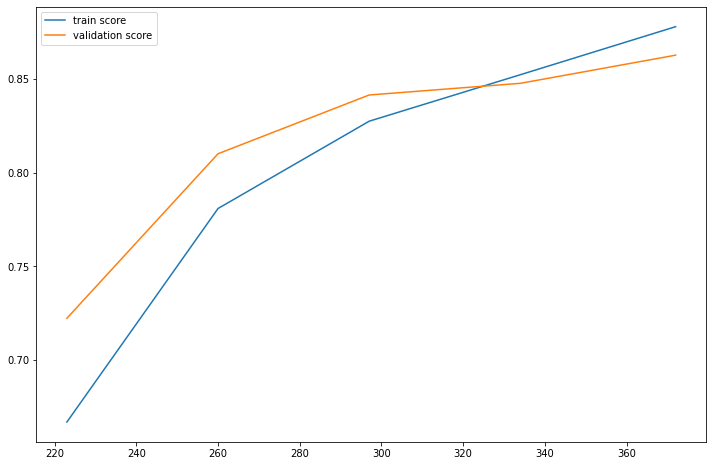

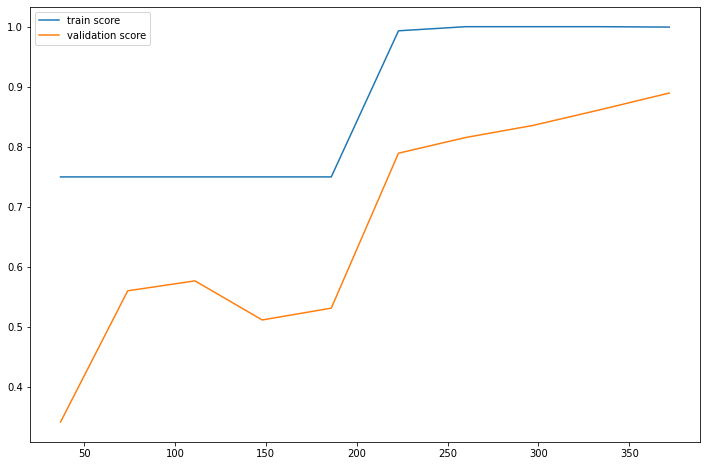

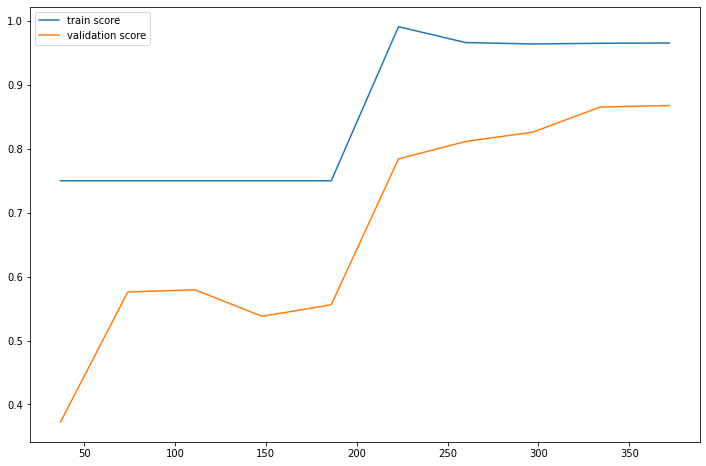

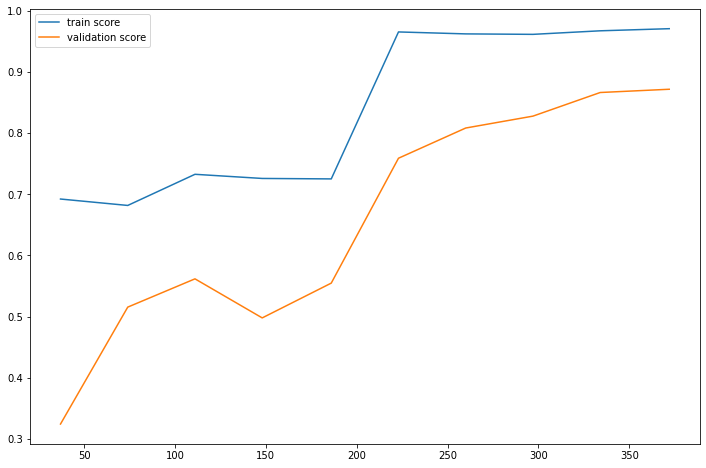

In [68]:
# Models evaluation NOUVEAU

for name, model in dict_of_models.items():
    print(name)
    evaluation_smote(model)

LogisticRegression


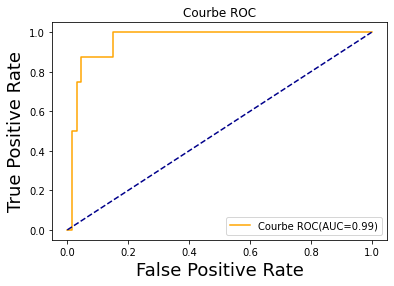

SVM


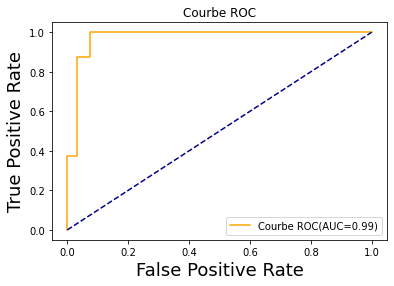

RandomForest


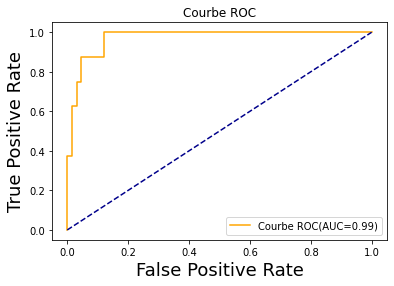

AdaBoost


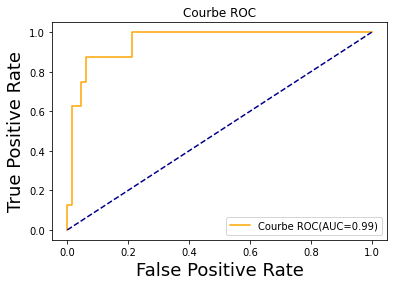

XGBoost


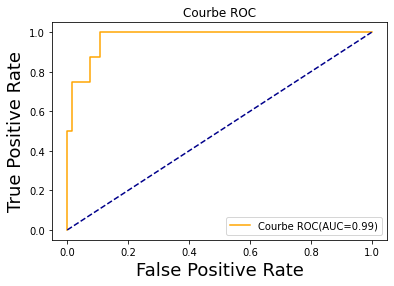

In [69]:
# Models evaluation with ROC curve and AUC

for name, model in dict_of_models.items():
    print(name)
    model.fit(x_train_smote, y_train_smote)
    probs=model.predict_proba(x_test)
    probs = probs[:, 1]
    #auc = roc_auc_score(y_test, probs)
    #print('AUC: %.2f' % auc)
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    plot_roc_curve(fpr, tpr)

L'ensemble de données d'entrainement est maintenant équilibré

In [70]:
# Model creation
from sklearn.metrics import accuracy_score
def evaluation(model):
    
    model.fit(x_train_smote, y_train_smote)
    ypred = model.predict(x_test)
    
    #print(confusion_matrix(y_test, ypred))
    #print(classification_report(y_test, ypred))
    print(accuracy_score(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, x_train, y_train,
                                              cv=4, scoring='accuracy',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

LogisticRegression
0.8783783783783784
SVM
0.918918918918919
RandomForest
0.9324324324324325
AdaBoost
0.918918918918919
XGBoost
0.8918918918918919


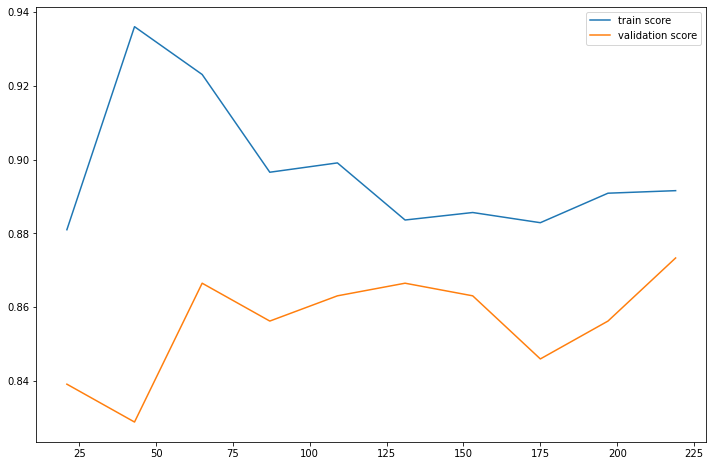

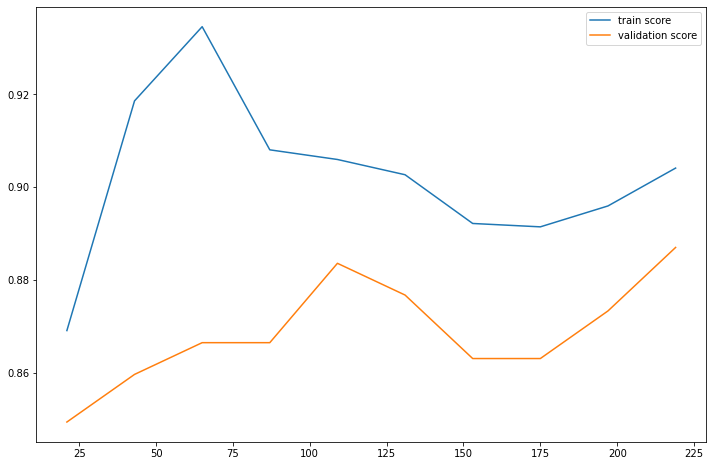

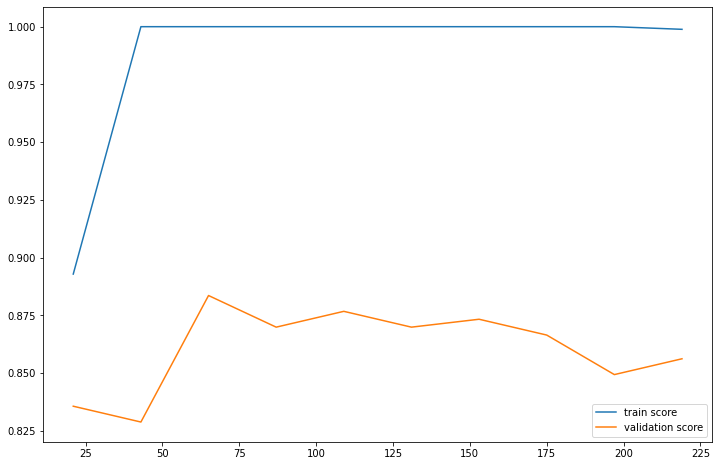

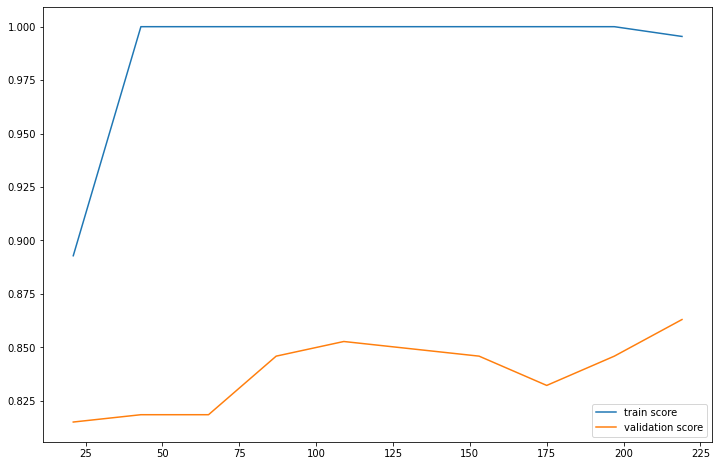

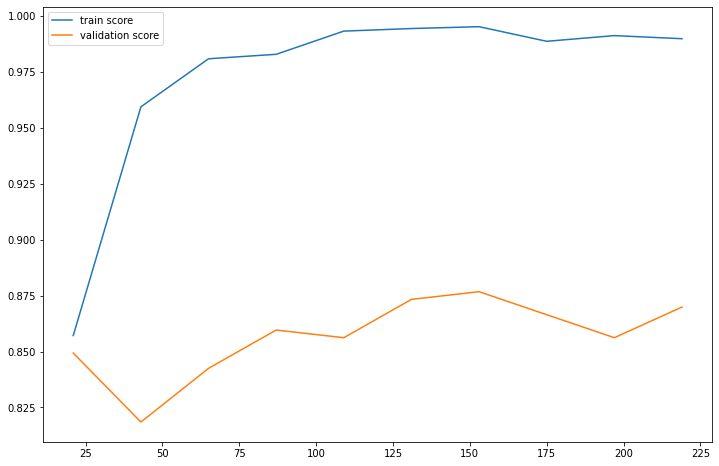

In [71]:
# Models evaluation

for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

The best precision is obtained with SVM. Its accuracy is 0.9 and its plotting doesn't show an overfitting.


In [72]:
# Librairy import
from sklearn.model_selection import RandomizedSearchCV

In [73]:
SVM

Pipeline(memory=None,
         steps=[('pipeline',
                 Pipeline(memory=None,
                          steps=[('polynomialfeatures',
                                  PolynomialFeatures(degree=2,
                                                     include_bias=False,
                                                     interaction_only=False,
                                                     order='C')),
                                 ('selectkbest',
                                  SelectKBest(k=10,
                                              score_func=<function f_classif at 0x7f9bec309a70>))],
                          verbose=False)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel

In [74]:
# RandomizedSearchCV use
# Hyperparameters dictionary creation
# RandomizedSearchCV object Creation

hyper_params_SVM = {'svc__gamma':[0.0001,0.0002,0.0003,0.0004,0.0005],
                'svc__C':[1, 10, 100, 1000,4000], 
               'pipeline__polynomialfeatures__degree':[2, 5],
               'pipeline__selectkbest__k': range(40, 60)}
grid_SVM = RandomizedSearchCV(SVM, hyper_params_SVM , scoring='accuracy', cv=4,
                          n_iter=100)

In [75]:
# RandomizedSearchCv training
grid_SVM.fit(x_train_smote, y_train_smote)

# Best hyperparameters display
print(grid_SVM.best_params_)

# Prediction vector creation
y_pred = grid_SVM.predict(x_test)

# Evaluation 
print(classification_report(y_test, y_pred))

{'svc__gamma': 0.0005, 'svc__C': 100, 'pipeline__selectkbest__k': 53, 'pipeline__polynomialfeatures__degree': 2}
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96        66
         1.0       0.67      0.75      0.71         8

    accuracy                           0.93        74
   macro avg       0.82      0.85      0.83        74
weighted avg       0.94      0.93      0.93        74



0.9324324324324325


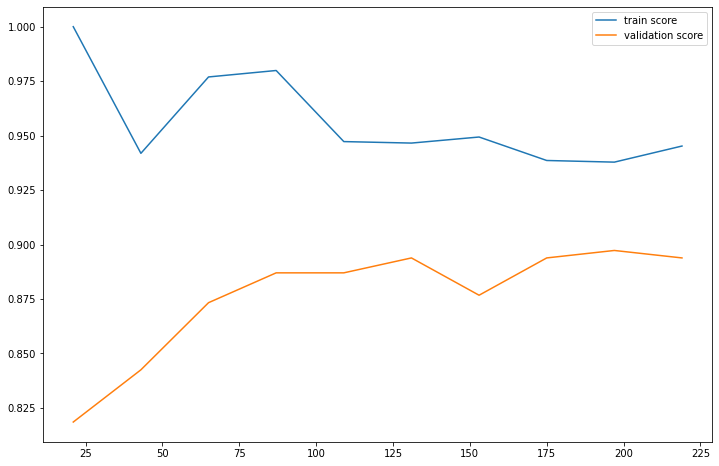

In [76]:
evaluation(grid_SVM.best_estimator_)

AUC: 0.98


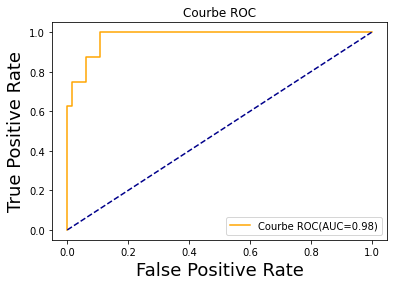

In [77]:
# Models evaluation with ROC curve and AUC after MissForet+SMOTE+RandomizedSearchCV
probs=grid_SVM.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

# Application de notre méthode à un autre ensemble de données

# Data source


Kaggle free dataset: [Stroke Prediction Dataset](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset).

In [78]:
#Data overview
from google.colab import files
import io
uploaded= files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [79]:
data=pd.read_csv(io.BytesIO(uploaded['healthcare-dataset-stroke-data.csv']))
data.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [80]:
# dataset´s shape

df3=data.copy()
df3.shape

(5110, 12)

# Target variable
The target variable is 'stroke'.

In [81]:
# the others variables overview
df3.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [82]:
# FEATURE SELECTION 1
# id is useless for the model. So, it must be dropped.
df3.drop('id', inplace=True, axis=1)
df3.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21   NaN     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1

# Numerical variables

In [83]:
# List of numerical variables
numerical_variables=[feature for feature in df3.columns if df3[feature].dtypes !='O']
df3[numerical_variables].head(5)

age  hypertension  heart_disease  avg_glucose_level   bmi  stroke
0  67.0             0              1             228.69  36.6       1
1  61.0             0              0             202.21   NaN       1
2  80.0             0              1             105.92  32.5       1
3  49.0             0              0             171.23  34.4       1
4  79.0             1              0             174.12  24.0       1

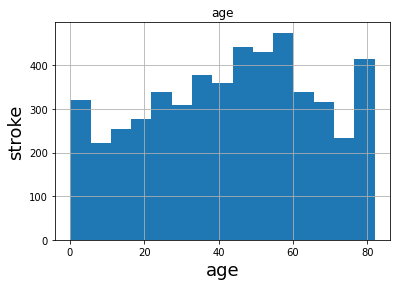

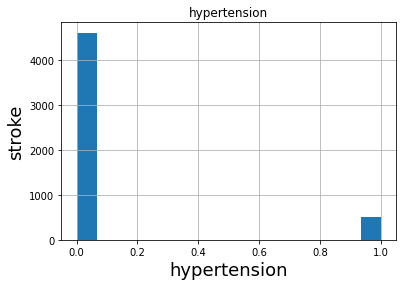

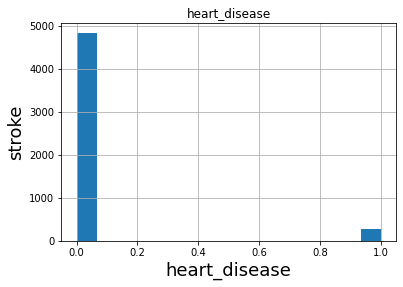

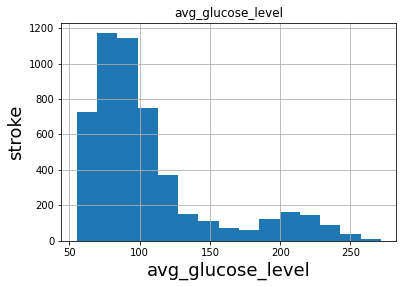

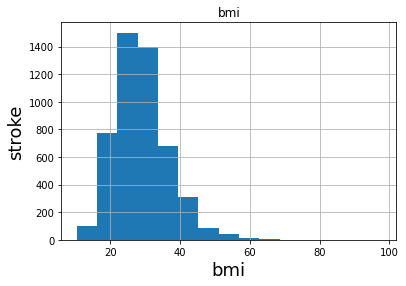

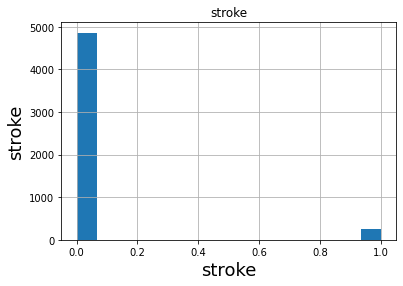

In [84]:
# Relationship between numerical variables and the target variable 
for feature in numerical_variables:
    df3[feature].hist(bins=15)
    plt.xlabel(feature)
    plt.ylabel('stroke')
    plt.title(feature)
    plt.show()

There is a relashionship beetween the numerical variables and the target variable. 

# Categorical variables

In [85]:
# Categorical features overview
categorical_feature=[feature for feature in df3.columns if df3[feature].dtypes=='O' ]
df3[categorical_feature].head()

gender ever_married      work_type Residence_type   smoking_status
0    Male          Yes        Private          Urban  formerly smoked
1  Female          Yes  Self-employed          Rural     never smoked
2    Male          Yes        Private          Rural     never smoked
3  Female          Yes        Private          Urban           smokes
4  Female          Yes  Self-employed          Rural     never smoked

In [86]:
# Categorical variables values
for feature in df3[categorical_feature] :
    print(f'{feature :-<50} {df3[feature].unique()}')

gender-------------------------------------------- ['Male' 'Female' 'Other']
ever_married-------------------------------------- ['Yes' 'No']
work_type----------------------------------------- ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type------------------------------------ ['Urban' 'Rural']
smoking_status------------------------------------ ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


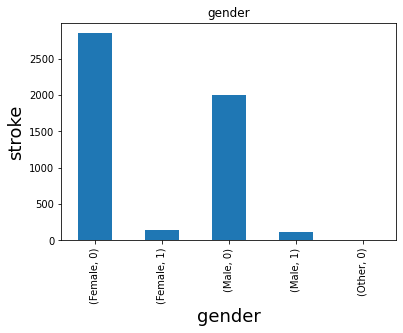

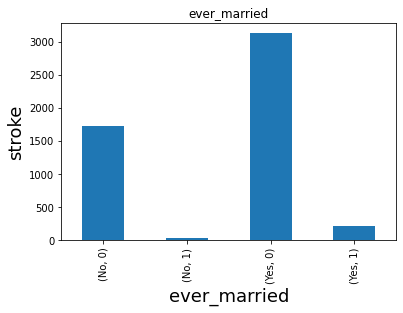

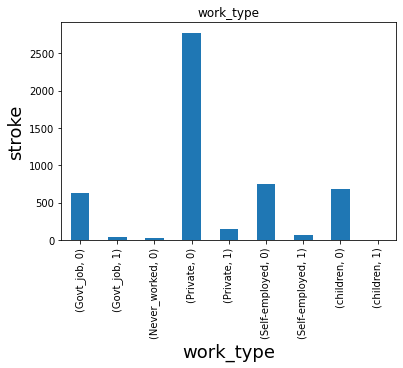

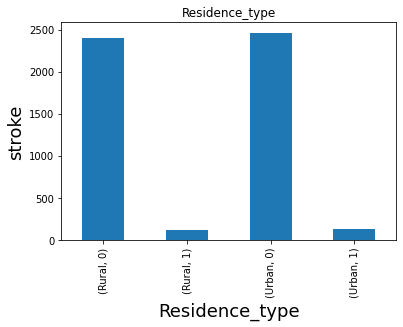

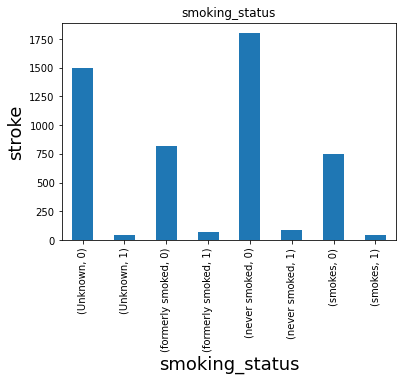

In [87]:
# Relationship between categorical variables and the target variable (stroke)
for feature in categorical_feature:
    data.groupby(feature)['stroke'].value_counts().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('stroke')
    plt.title(feature)
    plt.show()

# Missing values

In [88]:
#Check if any null value is present
df3.isnull().values.any()

True

In [89]:
# Missing values rate per variable

(df3.isna().sum()/df3.shape[0]).sort_values(ascending=True)

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
smoking_status       0.000000
stroke               0.000000
bmi                  0.039335
dtype: float64

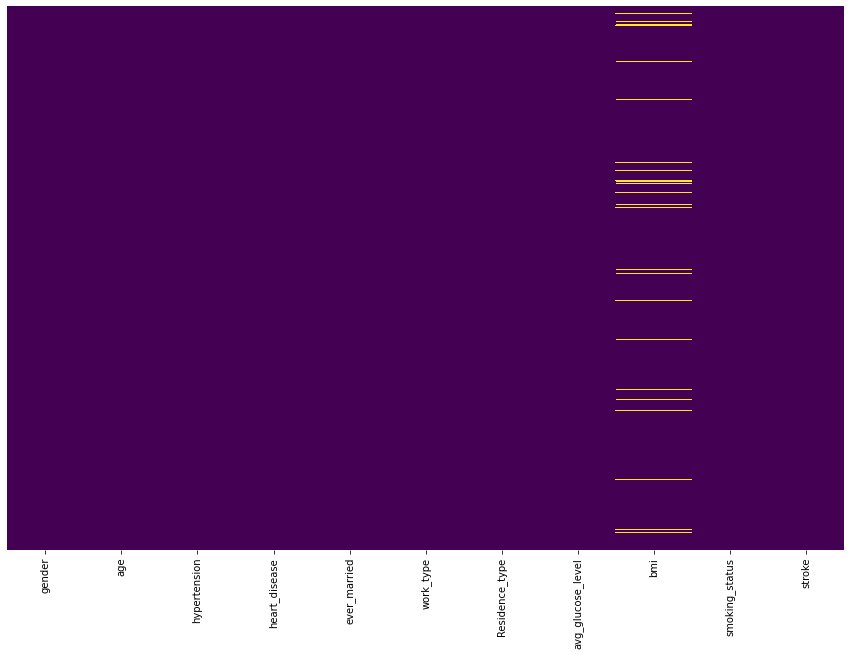

In [90]:
# Plotting missing values
plt.figure(figsize=(15,10))
sns.heatmap(df3.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Examination of the the target variable

In [91]:
# Number of target variable classes

df3['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

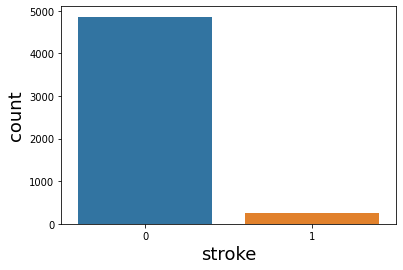

In [92]:
#Visualization of the target variable

sns.countplot(x='stroke',data=df3)

In [93]:
# Percentage of the target variable classes 

df3['stroke'].value_counts(normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

In [94]:
# Encoding function

def encoding(df):
    coding={'Male':1,
       'Female':0,
       #'Other':2,
       'Yes':1,
       'No':0,
       'Private':0,
       'Self-employed':1,
       'Govt_job':2,
       'children':3,
       'Never_worked':4,
       'Urban':0,
       'Rural':1,
       'formerly smoked':0,
       'never smoked':1,
       'smokes':2
        #'Unknown'
           }
    for feature in df.select_dtypes('object'):
        df[feature]=df[feature].map(coding)
    return df

In [95]:
df3=encoding(df3)
df3.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0     1.0  67.0             0              1             1          0   
1     0.0  61.0             0              0             1          1   
2     1.0  80.0             0              1             1          0   
3     0.0  49.0             0              0             1          0   
4     0.0  79.0             1              0             1          1   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               0             228.69  36.6             0.0       1  
1               1             202.21   NaN             1.0       1  
2               1             105.92  32.5             1.0       1  
3               0             171.23  34.4             2.0       1  
4               1             174.12  24.0             1.0       1

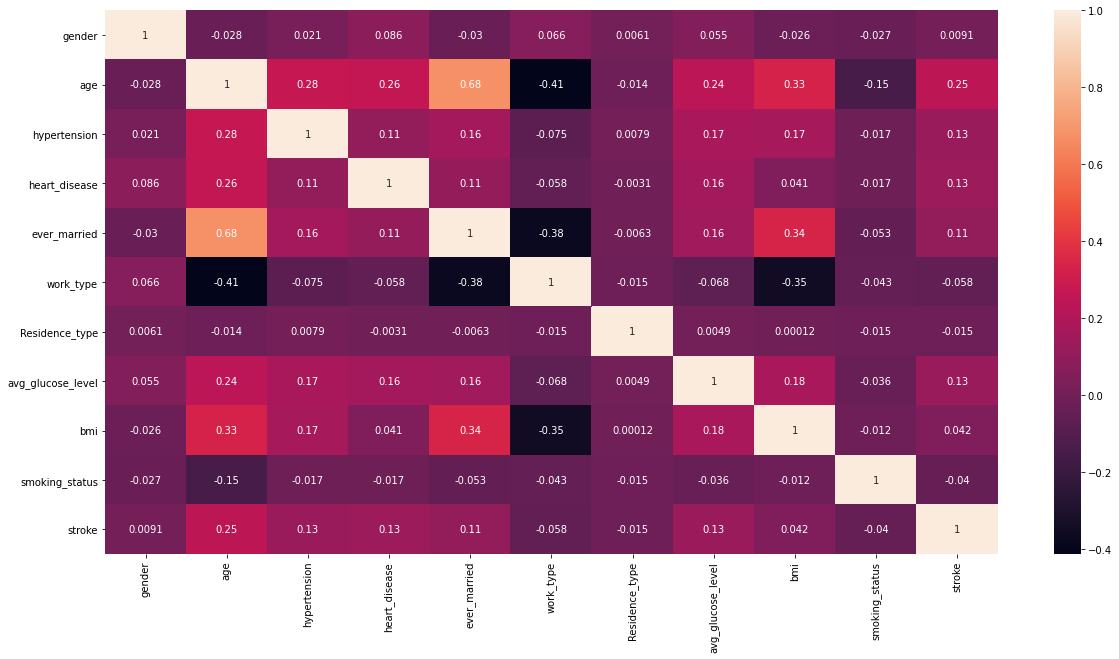

In [96]:
# Numerical variables correlation
plt.figure(figsize=(20,10))
sns.heatmap(df3.corr(), annot = True)

FEATURE SELECTION 2:
There is a correlation between the features 'age' and 'ever-married'. Since the correlation between 'age' and the target variable 'stroke' is higher, 'ever-married' must be dropped.

In [97]:
# FEATURE SELECTION 2
df3.drop('ever_married', inplace=True, axis=1)
df3.head()

gender   age  hypertension  heart_disease  work_type  Residence_type  \
0     1.0  67.0             0              1          0               0   
1     0.0  61.0             0              0          1               1   
2     1.0  80.0             0              1          0               1   
3     0.0  49.0             0              0          0               0   
4     0.0  79.0             1              0          1               1   

   avg_glucose_level   bmi  smoking_status  stroke  
0             228.69  36.6             0.0       1  
1             202.21   NaN             1.0       1  
2             105.92  32.5             1.0       1  
3             171.23  34.4             2.0       1  
4             174.12  24.0             1.0       1

In [98]:
# Train dataset - test dataset split-

from sklearn.model_selection import train_test_split
trainset3,testset3=train_test_split(df3,test_size=0.2,random_state=0)

In [99]:
# Verification of the number of target class in the train dataset 

trainset3['stroke'].value_counts()

0    3893
1     195
Name: stroke, dtype: int64

In [100]:
# Train dataset  target class rate

trainset3['stroke'].value_counts(normalize=True)

0    0.952299
1    0.047701
Name: stroke, dtype: float64

In [101]:
# Verification of the number of target class in the test dataset  

testset3['stroke'].value_counts()

0    968
1     54
Name: stroke, dtype: int64

In [102]:
# Test dataset  target class rate

testset3['stroke'].value_counts(normalize=True)

0    0.947162
1    0.052838
Name: stroke, dtype: float64

# Missing values imputation

In [103]:
# Missforest imputation procedure
def imputation3(df):
    imputer = MissForest()
    df_array= imputer.fit_transform(df)
    df = pd.DataFrame(df_array, columns=df.columns, index=df.index)
    return  df

In [104]:
def preprocessing3(df):
    df = imputation3(df)
    
    X = df.drop('stroke', axis=1)
    y = df['stroke']
    
    print(y.value_counts())
    
    return X, y

In [105]:
# Train dataset preprocessing
x_train3,y_train3=preprocessing3(trainset3)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
0.0    3893
1.0     195
Name: stroke, dtype: int64


In [106]:
# Test dataset preprocessing
x_test3, y_test3 = preprocessing3(testset3)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
0.0    968
1.0     54
Name: stroke, dtype: int64


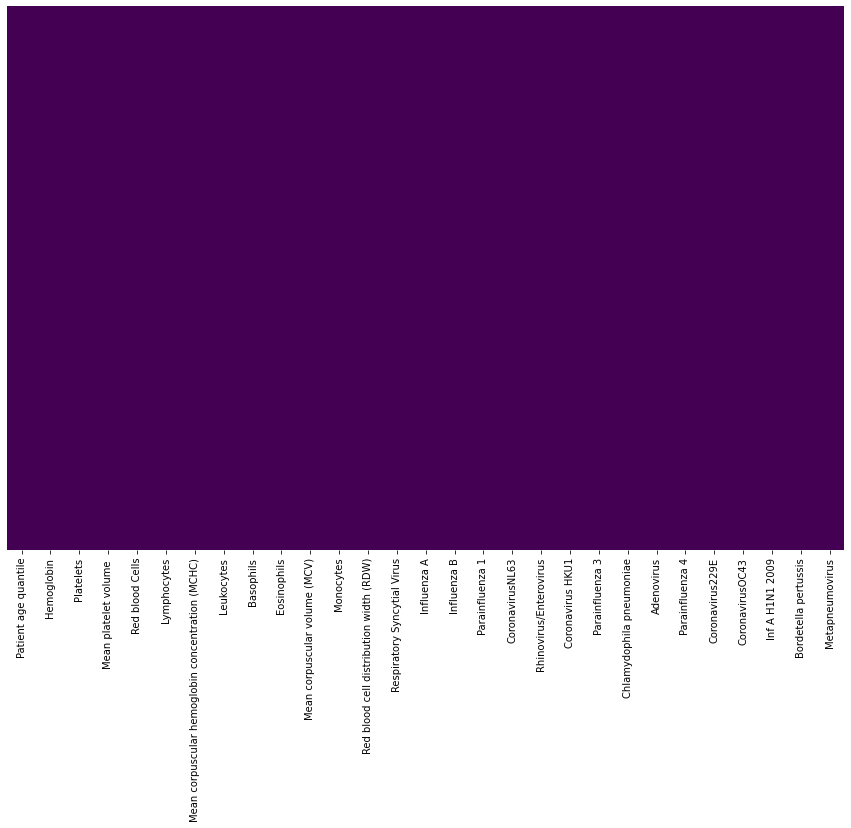

In [107]:
# New plotting of missing values
df3=x_train3 + x_test3
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Stroke model building

In [108]:
# A pipeline for feature engineering

preprocessor3 = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

In [109]:
# Libraries import
from sklearn.metrics import f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import learning_curve

In [110]:
# procedure for confusion matrix, f1 score and diagnostic curve code

def evaluation(model):
    
    model.fit(x_train3, y_train3)
    ypred = model.predict(x_test3)
    
    print(confusion_matrix(y_test3, ypred))
    print(classification_report(y_test3, ypred))
    
    N, train_score, val_score = learning_curve(model, x_train3, y_train3,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

In [111]:
# A dictionary for all models

dict_of_models = {'LogisticRegression':LogisticRegression,
                  'SVM': SVM,
                  'RandomForest': RandomForest,
                  'AdaBoost' : AdaBoost,
                  'XGBoost' : XGBoost
                 }

LogisticRegression
[[967   1]
 [ 53   1]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       968
         1.0       0.50      0.02      0.04        54

    accuracy                           0.95      1022
   macro avg       0.72      0.51      0.50      1022
weighted avg       0.92      0.95      0.92      1022

SVM
[[968   0]
 [ 54   0]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       968
         1.0       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022

RandomForest
[[964   4]
 [ 52   2]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       968
         1.0       0.33      0.04      0.07        54

    accuracy                           0.95      1022
   macro avg       0.64

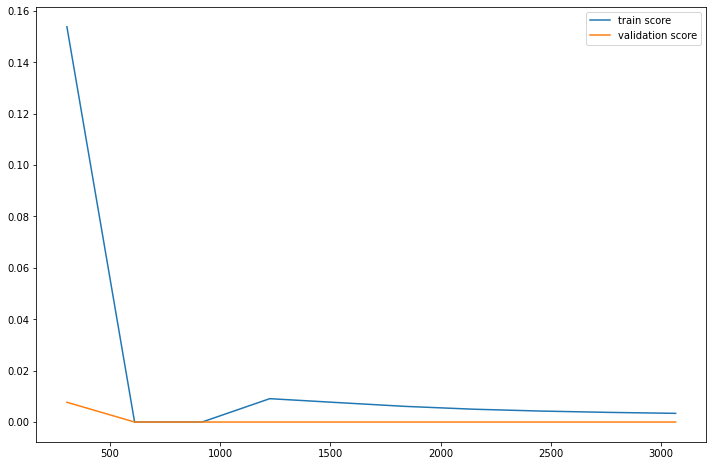

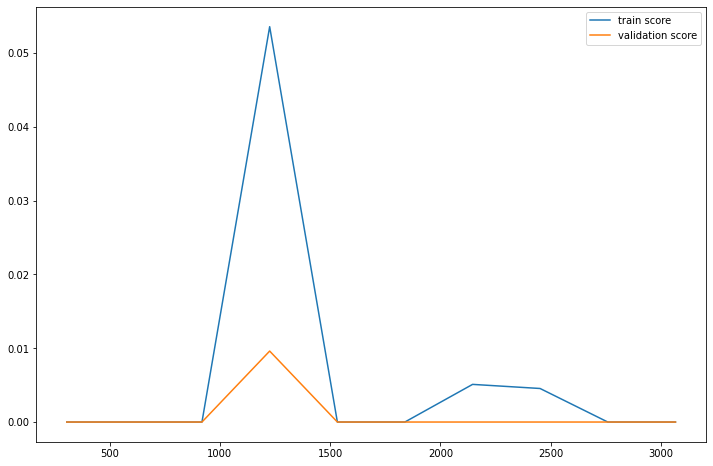

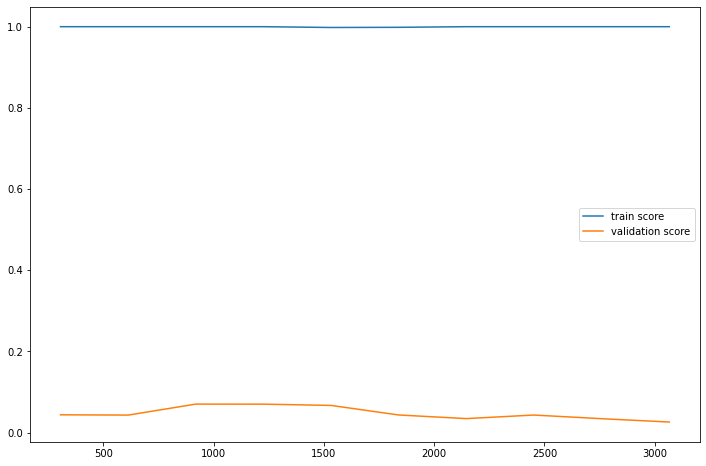

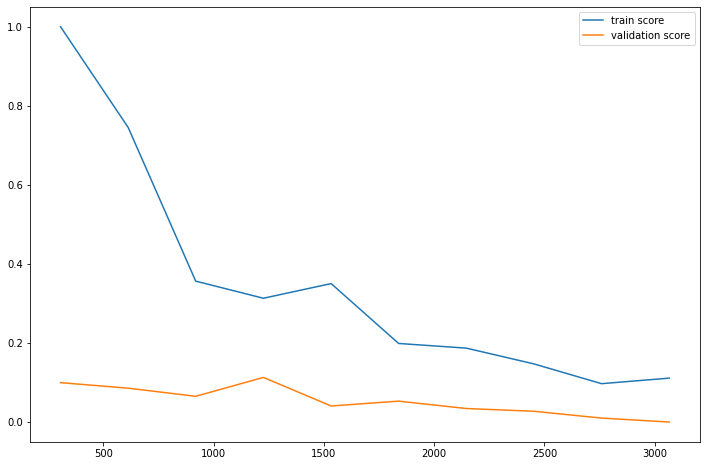

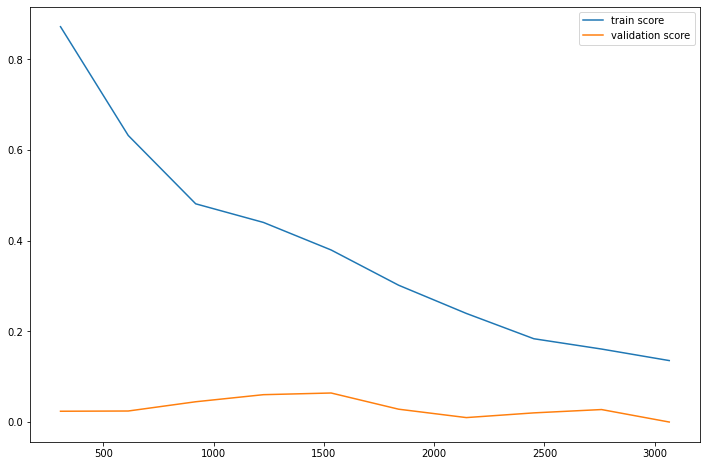

In [112]:
# Models evaluation

for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

In [113]:
# implementing SMOTE
from imblearn.over_sampling import SMOTE

In [114]:
# Creating SMOTE object
smote=SMOTE()

In [115]:
x_train_smote3,y_train_smote3=smote.fit_sample(x_train3,y_train3)

In [116]:
# Shape verification
from collections import Counter
print("Before SMOTE: ", Counter(y_train3))
print("After SMOTE: ", Counter(y_train_smote3))

Before SMOTE:  Counter({0.0: 3893, 1.0: 195})
After SMOTE:  Counter({0.0: 3893, 1.0: 3893})


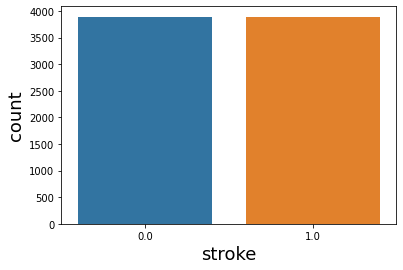

In [117]:
#Visualization of the target variable after SMOTE
df_smote=pd.DataFrame(y_train_smote3, columns=['stroke'])
sns.countplot(x='stroke',data=df_smote)

In [118]:
# Procedure code

def evaluation_smote(model):
    
    model.fit(x_train_smote3, y_train_smote3)
    ypred = model.predict(x_test3)
    
    print(confusion_matrix(y_test3, ypred))
    print(classification_report(y_test3, ypred))
    
    N, train_score, val_score = learning_curve(model, x_train_smote3, y_train_smote3,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

LogisticRegression
[[719 249]
 [ 18  36]]
              precision    recall  f1-score   support

         0.0       0.98      0.74      0.84       968
         1.0       0.13      0.67      0.21        54

    accuracy                           0.74      1022
   macro avg       0.55      0.70      0.53      1022
weighted avg       0.93      0.74      0.81      1022

SVM
[[829 139]
 [ 23  31]]
              precision    recall  f1-score   support

         0.0       0.97      0.86      0.91       968
         1.0       0.18      0.57      0.28        54

    accuracy                           0.84      1022
   macro avg       0.58      0.72      0.59      1022
weighted avg       0.93      0.84      0.88      1022

RandomForest
[[939  29]
 [ 51   3]]
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       968
         1.0       0.09      0.06      0.07        54

    accuracy                           0.92      1022
   macro avg       0.52

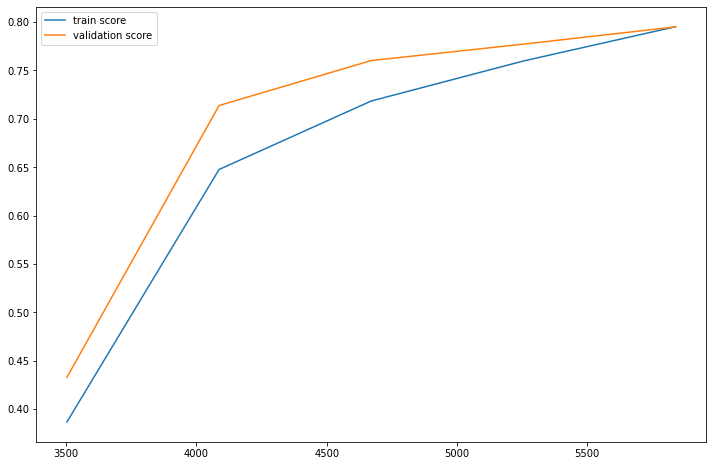

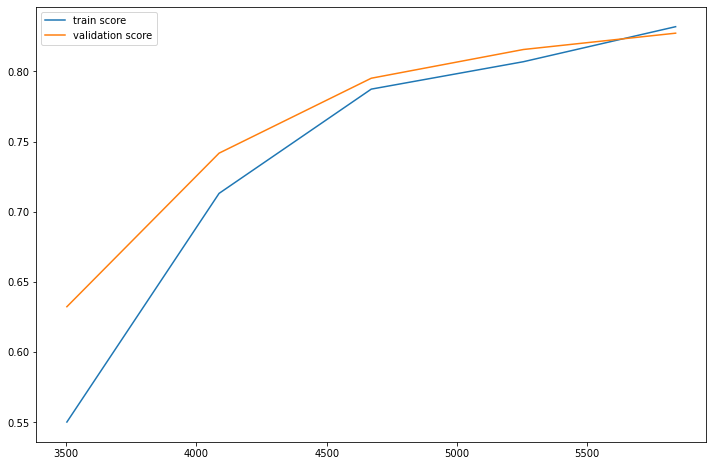

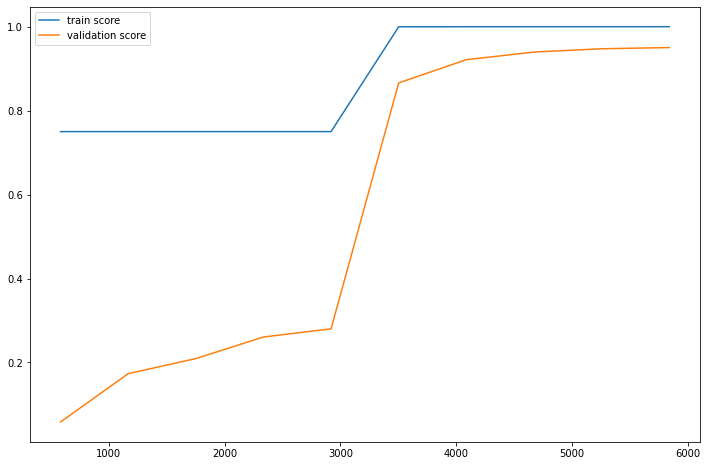

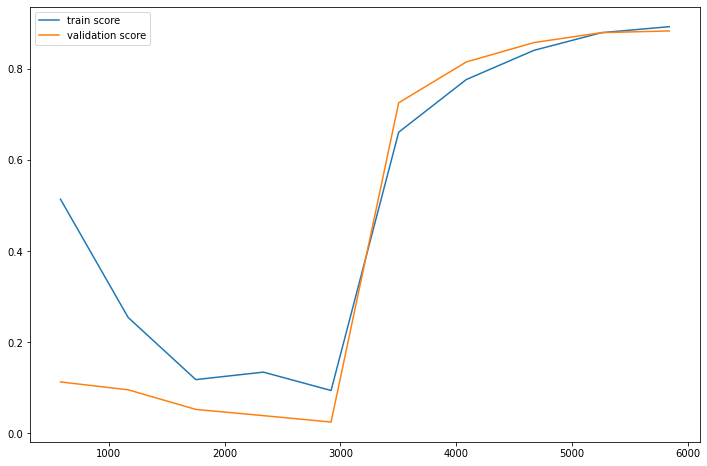

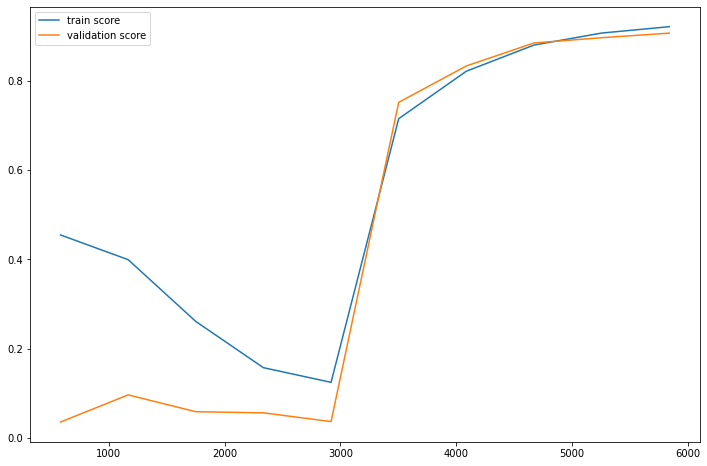

In [119]:
# Models evaluation NOUVEAU

for name, model in dict_of_models.items():
    print(name)
    evaluation_smote(model)

In [120]:
# ROC Curve procedure code
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange', label='Courbe ROC(AUC=%.2f)'%auc)
    plt.plot([0,1],[0,1], color='darkblue',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Courbe ROC')
    plt.legend(loc='lower right')
    plt.show()


LogisticRegression


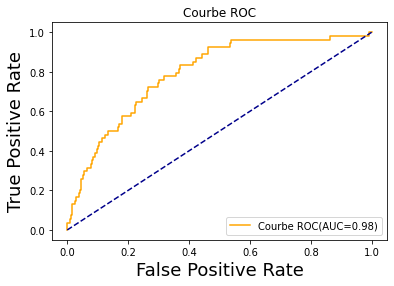

SVM


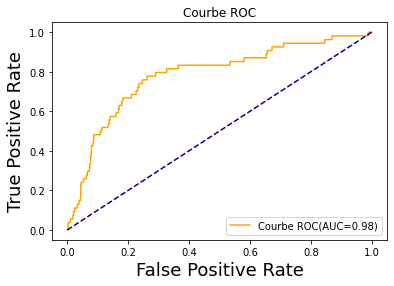

RandomForest


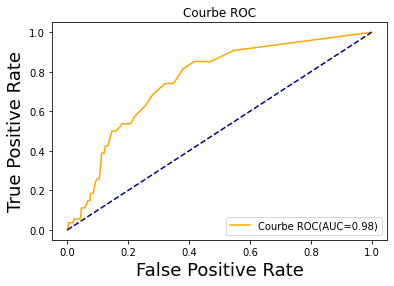

AdaBoost


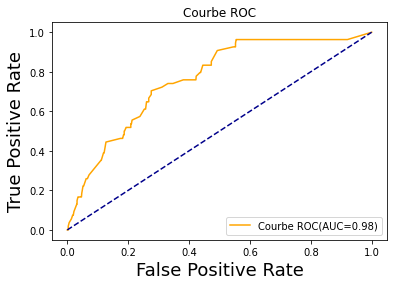

XGBoost


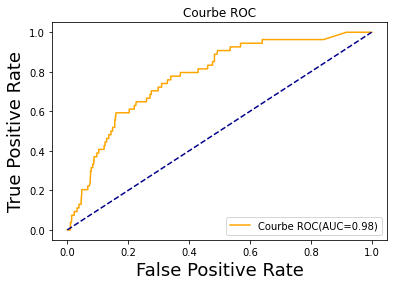

In [121]:
# Models evaluation with ROC curve and AUC

for name, model in dict_of_models.items():
    print(name)
    model.fit(x_train_smote3, y_train_smote3)
    probs=model.predict_proba(x_test3)
    probs = probs[:, 1]
    #auc = roc_auc_score(y_test, probs)
    #print('AUC: %.2f' % auc)
    fpr, tpr, thresholds = roc_curve(y_test3, probs)
    plot_roc_curve(fpr, tpr)

In [122]:
# Model creation
from sklearn.metrics import accuracy_score
def evaluation(model):
    
    model.fit(x_train_smote3, y_train_smote3)
    ypred = model.predict(x_test3)
    
    #print(confusion_matrix(y_test, ypred))
    #print(classification_report(y_test, ypred))
    print(accuracy_score(y_test3, ypred))
    
    N, train_score, val_score = learning_curve(model, x_train_smote3, y_train_smote3,
                                              cv=4, scoring='accuracy',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

LogisticRegression
0.738747553816047
SVM
0.8414872798434442
RandomForest
0.9217221135029354
AdaBoost
0.8610567514677103
XGBoost
0.9060665362035225


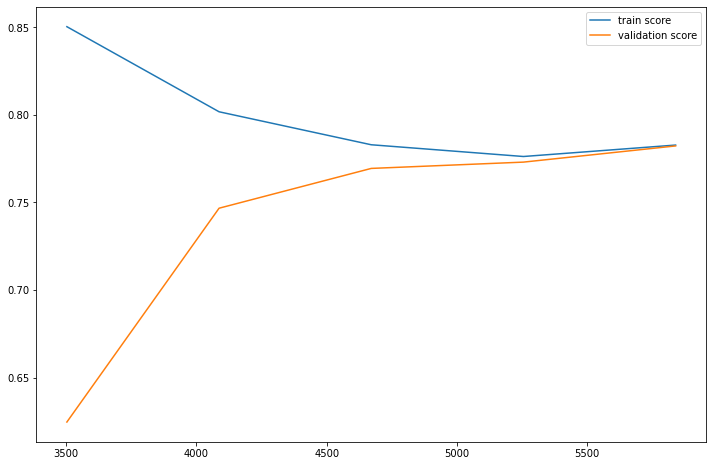

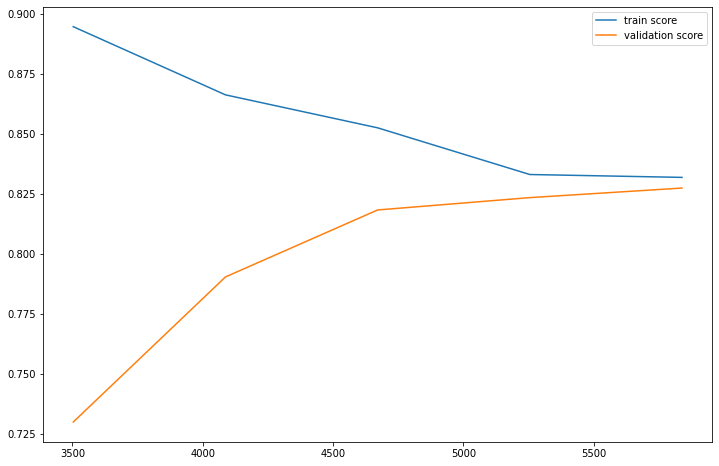

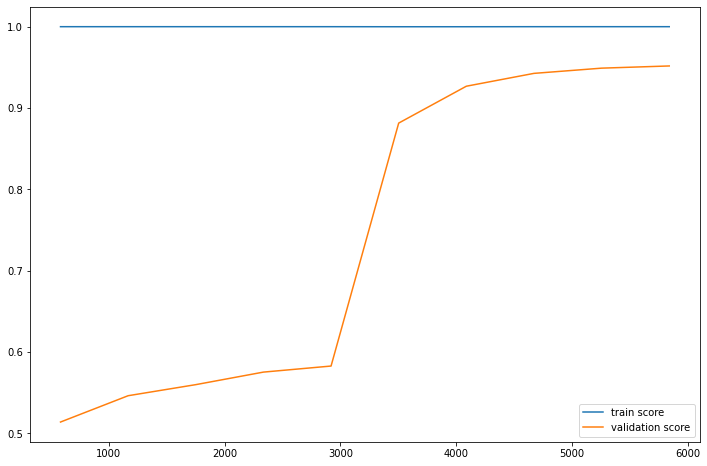

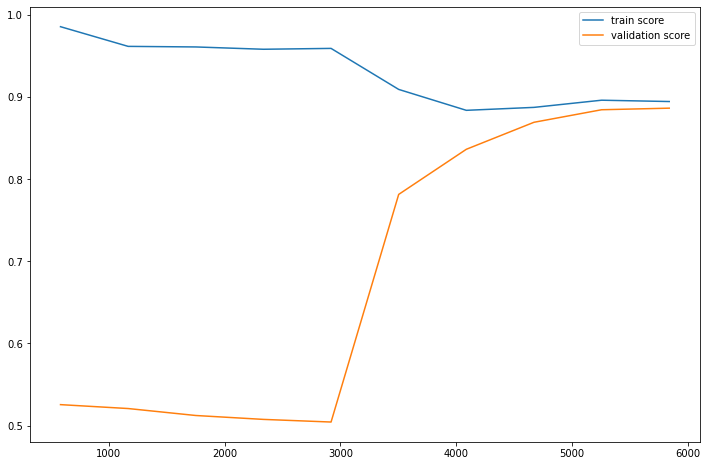

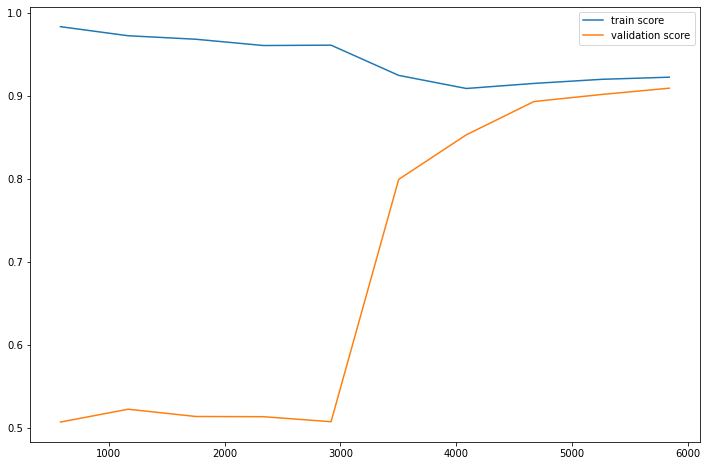

In [123]:
# Models evaluation

for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

In [124]:
RandomForest

Pipeline(memory=None,
         steps=[('pipeline',
                 Pipeline(memory=None,
                          steps=[('polynomialfeatures',
                                  PolynomialFeatures(degree=2,
                                                     include_bias=False,
                                                     interaction_only=False,
                                                     order='C')),
                                 ('selectkbest',
                                  SelectKBest(k=10,
                                              score_func=<function f_classif at 0x7f9bec309a70>))],
                          verbose=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, ma

In [441]:
#import numpy as np
bootstrap=[True]
max_depth=[30]
min_samples_leaf=[5]
min_samples_split=[15]
n_estimators = [1200]
max_features = ['auto']


In [442]:
hyper_params_RF = {
               'randomforestclassifier__n_estimators': n_estimators,
               'randomforestclassifier__max_features': max_features,
               'randomforestclassifier__max_depth': max_depth,
               'randomforestclassifier__min_samples_split': min_samples_split,
               'randomforestclassifier__min_samples_leaf': min_samples_leaf,
               'randomforestclassifier__bootstrap': bootstrap}
grid_RF = RandomizedSearchCV(RandomForest, hyper_params_RF, scoring='accuracy', cv=4,
                          n_iter=100)


In [443]:
from sklearn.metrics import accuracy_score
# RandomizedSearchCv training
grid_RF.fit(x_train_smote3, y_train_smote3)

# Best hyperparameters display
print(grid_RF.best_params_)

# Prediction vector creation
y_pred = grid_RF.predict(x_test3)

# Evaluation 
print(classification_report(y_test3, y_pred))

{'randomforestclassifier__n_estimators': 1200, 'randomforestclassifier__min_samples_split': 15, 'randomforestclassifier__min_samples_leaf': 5, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__max_depth': 30, 'randomforestclassifier__bootstrap': True}
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96       968
         1.0       0.17      0.13      0.15        54

    accuracy                           0.92      1022
   macro avg       0.56      0.55      0.55      1022
weighted avg       0.91      0.92      0.91      1022



AUC: 0.78


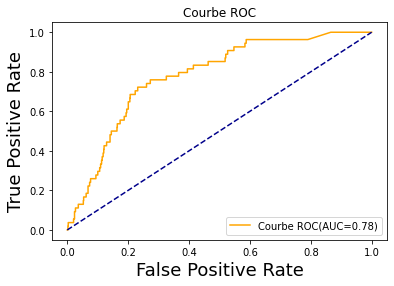

In [444]:
# Models evaluation with ROC curve and AUC after MissForet+SMOTE+RandomizedSearchCV
probs=grid_RF.predict_proba(x_test3)
probs = probs[:, 1]
auc = roc_auc_score(y_test3, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test3, probs)
plot_roc_curve(fpr, tpr)